<<h1 style="color: blue; text-align: center; font-size: 30px;"><b>IoTGuardian: Real-Time Threat Detection System Using RT-IoT2022 </b></h1>
<h1 style="color: blue; text-align: center; font-size: 25px;"><b>DSML Capstone Project</b></h1>

### Name : Nisha A K
### Organization: Entri Elevate


<h1 style="color: brown; text-align: left; font-size: 25px;"> Problem Description: Real-Time Threat Detection System Using RT-IoT2022 </b></h1>

#### Background
With the proliferation of IoT devices in critical sectors such as healthcare, smart homes, and industrial automation, ensuring network security has become a paramount concern. IoT networks are inherently vulnerable to cyber threats due to their resource-constrained nature and lack of robust security mechanisms. The RT-IoT 2022 dataset provides a rich source of real-world network traffic data, capturing both normal operations and various sophisticated cyber-attack patterns.

#### Problem Statement
The goal of this project is to leverage the RT-IoT 2022 dataset to analyze IoT network traffic and develop a machine learning-based Intrusion Detection System (IDS). This system should be capable of accurately identifying malicious network activities, distinguishing between different types of attacks, and enhancing the resilience of IoT environments against cyber threats.


<h1 style="color: brown; text-align: left; font-size: 25px;"> Objective </b></h1>

Create machine learning models that can effectively:

1. Process bidirectional network traffic data
2. Analyze patterns from diverse IoT devices (ThingSpeak-LED, Wipro-Bulb, MQTT-Temp)
3. Identify and classify various attack patterns"

<h1 style="color: brown; text-align: left; font-size: 25px;"> Dataset Overview </b></h1>
The RT-IoT 2022 dataset integrates traffic from diverse IoT devices, such as ThingSpeak-LED, Wipro-Bulb, and MQTT-Temp, while incorporating real and simulated cyber-attacks, including:

* Brute-Force SSH Attacks
* DDoS Attacks (Hping & Slowloris)
* Nmap Scanning Patterns

The dataset features bidirectional network traffic attributes, captured through the Zeek network monitoring tool and the Flowmeter plugin, ensuring a comprehensive representation of IoT network behavior.

### Structure

- Number of Instances: 123,117
- Number of Features: 83

### Target 

- The target variable in the RT-IoT2022 dataset represents different types of network traffic behavior, including normal and attack patterns. It is a categorical variable used for classification tasks, helping in intrusion detection within IoT networks.

- The dataset contains 12 target labels, categorized as either Normal Traffic or Attack Traffic


### Dataset Link: 
https://archive.ics.uci.edu/dataset/942/rt-iot2022


<h1 style="color: DodgerBlue; text-align: left; font-size: 20px;"> Importing Libraries

In [7]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
import joblib
import warnings
warnings.filterwarnings('ignore')

<h1 style="color: brown; text-align: left; font-size: 25px;"> Preprocessing and EDA </b></h1>

Both Preprocessing and EDA are crucial steps in the data analysis pipeline. Preprocessing ensures data quality, while EDA provides insights that guide feature selection and model building. Without these steps, models may produce inaccurate predictions due to poor-quality data.

### Preprocessing ensures data is clean and structured before analysis.

* Step 1: Load the Data
Read the dataset using pandas or other libraries.

* Step 2: Understand the Data Structure
Check the shape and data types.

* Step 3: Handle Missing Data
Identify missing values and apply strategies:

* Step 4: Handle Duplicates
Remove duplicate records if found.

* Step 5: Handle Outliers
Detect and remove or transform outliers.

* Step 6: Encode Categorical Variables
Convert categorical data into numerical format.

* Step 7: Feature Scaling
Normalize or standardize data for consistency.

* Step 8: Feature Engineering (If Required)
Create new features or modify existing ones.

### Exploratory Data Analysis (EDA) Steps

* Step 1: Understand Data Distribution
Visualize distributions.

* Step 2: Summary Statistics
Get descriptive statistics.

* Step 3: Detect Outliers
Use boxplots to identify outliers.

* Step 4: Check Correlations Between Features
Identify relationships between variables.

* Step 5: Identify Trends and Patterns
Use pairplots and scatterplots to find relationships.

* Step 6: Analyze Categorical Features
Check category distributions.

<h1 style="color: DodgerBlue; text-align: left; font-size: 20px;"> Loading the Data

In [11]:
data = pd.read_csv('new_rt_IOT.csv')

In [12]:
df = pd.DataFrame(data)

In [13]:
df.head()

,Unnamed: 0,id,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0,0,38667,1883,tcp,mqtt,32.011598,9,5,3,...,0.0,29729182.96,29729182.96,29729182.96,29729182.96,0.0,64240,26847,502,MQTT_Publish
1,1,1,51143,1883,tcp,mqtt,31.883584,9,5,3,...,0.0,29855277.06,29855277.06,29855277.06,29855277.06,0.0,64240,26847,502,MQTT_Publish
2,2,2,44761,1883,tcp,mqtt,32.124053,9,5,3,...,0.0,29842149.02,29842149.02,29842149.02,29842149.02,0.0,64240,26847,502,MQTT_Publish
3,3,3,60893,1883,tcp,mqtt,31.961063,9,5,3,...,0.0,29913774.97,29913774.97,29913774.97,29913774.97,0.0,64240,26847,502,MQTT_Publish
4,4,4,51087,1883,tcp,mqtt,31.902362,9,5,3,...,0.0,29814704.90,29814704.90,29814704.90,29814704.90,0.0,64240,26847,502,MQTT_Publish


In [14]:
df.tail(5)

,Unnamed: 0,id,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
123112,123112,2005,59247,63331,tcp,-,0.000006,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123113,123113,2006,59247,64623,tcp,-,0.000007,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123114,123114,2007,59247,64680,tcp,-,0.000006,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123115,123115,2008,59247,65000,tcp,-,0.000006,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123116,123116,2009,59247,65129,tcp,-,0.000006,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN


Both Preprocessing and EDA are crucial steps in the data analysis pipeline. Preprocessing ensures data quality, while EDA provides insights that guide feature selection and model building. Without these steps, models may produce inaccurate predictions due to poor-quality data.

<h1 style="color: DodgerBlue; text-align: left; font-size: 20px;"> Dropping unwanted columns

In [17]:
df.drop(columns = ['Unnamed: 0','id'], inplace = True)

In [18]:
df.head()

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,0.281148,...,0.0,29729182.96,29729182.96,29729182.96,29729182.96,0.0,64240,26847,502,MQTT_Publish
1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,0.282277,...,0.0,29855277.06,29855277.06,29855277.06,29855277.06,0.0,64240,26847,502,MQTT_Publish
2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,0.280164,...,0.0,29842149.02,29842149.02,29842149.02,29842149.02,0.0,64240,26847,502,MQTT_Publish
3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,0.281593,...,0.0,29913774.97,29913774.97,29913774.97,29913774.97,0.0,64240,26847,502,MQTT_Publish
4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,0.282111,...,0.0,29814704.90,29814704.90,29814704.90,29814704.90,0.0,64240,26847,502,MQTT_Publish


In [19]:
df.columns

Index(['id.orig_p', 'id.resp_p', 'proto', 'service', 'flow_duration',
       'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
       '

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 84 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id.orig_p                 123117 non-null  int64  
 1   id.resp_p                 123117 non-null  int64  
 2   proto                     123117 non-null  object 
 3   service                   123117 non-null  object 
 4   flow_duration             123117 non-null  float64
 5   fwd_pkts_tot              123117 non-null  int64  
 6   bwd_pkts_tot              123117 non-null  int64  
 7   fwd_data_pkts_tot         123117 non-null  int64  
 8   bwd_data_pkts_tot         123117 non-null  int64  
 9   fwd_pkts_per_sec          123117 non-null  float64
 10  bwd_pkts_per_sec          123117 non-null  float64
 11  flow_pkts_per_sec         123117 non-null  float64
 12  down_up_ratio             123117 non-null  float64
 13  fwd_header_size_tot       123117 non-null  i

In [21]:
df.describe()

,id.orig_p,id.resp_p,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
count,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,1.231170e+05,1.231170e+05,1.231170e+05,...,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,123117.000000,123117.000000,123117.000000
mean,34639.258738,1014.305092,3.809566,2.268826,1.909509,1.471218,0.820260,3.518063e+05,3.517620e+05,7.035683e+05,...,1.481354e+05,2.353599e+04,1.616655e+06,1.701956e+06,3.517644e+06,1.664985e+06,4.550183e+04,6118.905123,2739.776018,751.647514
std,19070.620354,5256.371994,130.005408,22.336565,33.018311,19.635196,32.293948,3.707645e+05,3.708015e+05,7.415634e+05,...,1.613007e+06,1.477935e+06,8.809396e+06,9.252337e+06,1.229508e+08,9.007064e+06,1.091361e+06,18716.313861,10018.848534,6310.183843
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,17702.000000,21.000000,0.000001,1.000000,1.000000,1.000000,0.000000,7.454354e+01,7.288927e+01,1.490871e+02,...,9.536740e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
50%,37221.000000,21.000000,0.000004,1.000000,1.000000,1.000000,0.000000,2.467238e+05,2.467238e+05,4.934475e+05,...,4.053116e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
75%,50971.000000,21.000000,0.000005,1.000000,1.000000,1.000000,0.000000,5.242880e+05,5.242880e+05,1.048576e+06,...,5.006790e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
max,65535.000000,65389.000000,21728.335580,4345.000000,10112.000000,4345.000000,10105.000000,1.048576e+06,1.048576e+06,2.097152e+06,...,4.374931e+08,4.774862e+08,3.000000e+08,3.000000e+08,2.096777e+10,3.000000e+08,1.208029e+08,65535.000000,65535.000000,65535.000000


In [22]:
df.isna().sum()

id.orig_p               0
id.resp_p               0
proto                   0
service                 0
flow_duration           0
                       ..
idle.std                0
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
Attack_type             0
Length: 84, dtype: int64

<h1 style="color: DodgerBlue; text-align: left; font-size: 20px;"> Checking null values

In [24]:
df.isnull().sum()

id.orig_p               0
id.resp_p               0
proto                   0
service                 0
flow_duration           0
                       ..
idle.std                0
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
Attack_type             0
Length: 84, dtype: int64

<h1 style="color: green; text-align: left; font-size: 15px;"> No null values detected </b></h1>

<h1 style="color: DodgerBlue; text-align: left; font-size: 20px;"> Checking for duplicates

In [27]:
df.duplicated().sum()

5195

In [28]:
df.drop_duplicates(inplace = True)

In [29]:
df.duplicated().sum()

0

<h1 style="color: green; text-align: left; font-size: 15px;"> found 5195 duplicate values and it is removed </b></h1>

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117922 entries, 0 to 123116
Data columns (total 84 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id.orig_p                 117922 non-null  int64  
 1   id.resp_p                 117922 non-null  int64  
 2   proto                     117922 non-null  object 
 3   service                   117922 non-null  object 
 4   flow_duration             117922 non-null  float64
 5   fwd_pkts_tot              117922 non-null  int64  
 6   bwd_pkts_tot              117922 non-null  int64  
 7   fwd_data_pkts_tot         117922 non-null  int64  
 8   bwd_data_pkts_tot         117922 non-null  int64  
 9   fwd_pkts_per_sec          117922 non-null  float64
 10  bwd_pkts_per_sec          117922 non-null  float64
 11  flow_pkts_per_sec         117922 non-null  float64
 12  down_up_ratio             117922 non-null  float64
 13  fwd_header_size_tot       117922 non-null  int64 

<h1 style="color: DodgerBlue; text-align: left; font-size: 20px;"> Summary Statistics

In [33]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id.orig_p,117922.0,NaN,NaN,NaN,34949.094317,18966.047699,0.0,18352.25,37534.0,51036.0,65535.0
id.resp_p,117922.0,NaN,NaN,NaN,1050.812266,5364.536754,0.0,21.0,21.0,21.0,65389.0
proto,117922,3,tcp,105592,NaN,NaN,NaN,NaN,NaN,NaN,NaN
service,117922,10,-,98199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flow_duration,117922.0,NaN,NaN,NaN,3.808474,127.064242,0.0,0.000001,0.000004,0.000005,21728.33558
...,...,...,...,...,...,...,...,...,...,...,...
idle.std,117922.0,NaN,NaN,NaN,47210.692713,1114041.143033,0.0,0.0,0.0,0.0,120802870.6
fwd_init_window_size,117922.0,NaN,NaN,NaN,6248.730101,18893.603277,0.0,64.0,64.0,64.0,65535.0
bwd_init_window_size,117922.0,NaN,NaN,NaN,2816.081393,10167.532706,0.0,0.0,0.0,0.0,65535.0
fwd_last_window_size,117922.0,NaN,NaN,NaN,740.173165,6242.32384,0.0,64.0,64.0,64.0,65535.0


In [34]:
df.dtypes

id.orig_p                 int64
id.resp_p                 int64
proto                    object
service                  object
flow_duration           float64
                         ...   
idle.std                float64
fwd_init_window_size      int64
bwd_init_window_size      int64
fwd_last_window_size      int64
Attack_type              object
Length: 84, dtype: object

In [35]:
attack_count = df['Attack_type'].value_counts()

In [36]:
attack_count

Attack_type
DOS_SYN_Hping                 90089
Thing_Speak                    7654
ARP_poisioning                 7625
MQTT_Publish                   4142
NMAP_UDP_SCAN                  2584
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  533
Wipro_bulb                      219
Metasploit_Brute_Force_SSH       36
NMAP_FIN_SCAN                    28
Name: count, dtype: int64

In [37]:
df['proto'].value_counts()

proto
tcp     105592
udp      12296
icmp        34
Name: count, dtype: int64

In [38]:
df['service'].value_counts()

service
-         98199
dns        9444
mqtt       4132
http       3289
ssl        2656
ntp         115
dhcp         29
irc          28
ssh          28
radius        2
Name: count, dtype: int64

In [39]:
df['service'] = df['service'].replace('-', 'unknown')

In [40]:
df['service'].value_counts()

service
unknown    98199
dns         9444
mqtt        4132
http        3289
ssl         2656
ntp          115
dhcp          29
irc           28
ssh           28
radius         2
Name: count, dtype: int64

<h1 style="color: DodgerBlue; text-align: left; font-size: 20px;"> Visualisations

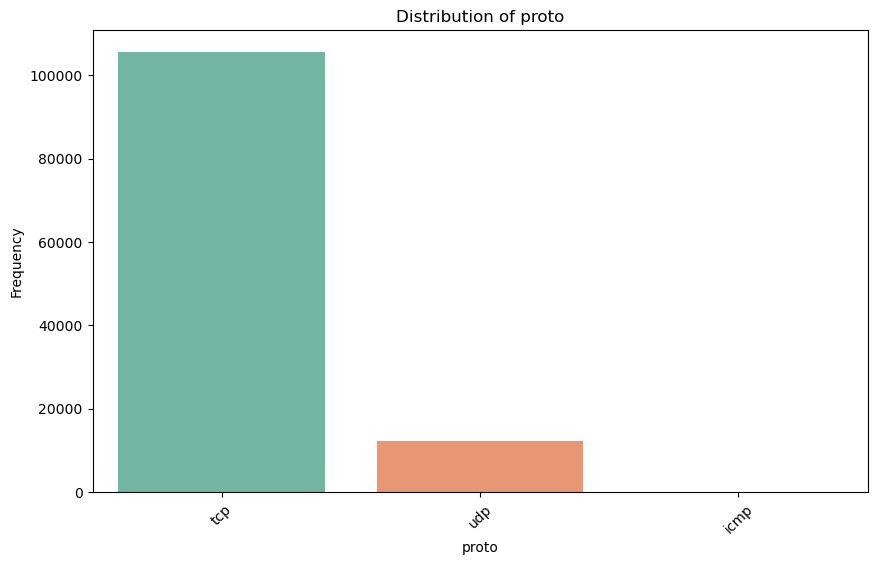

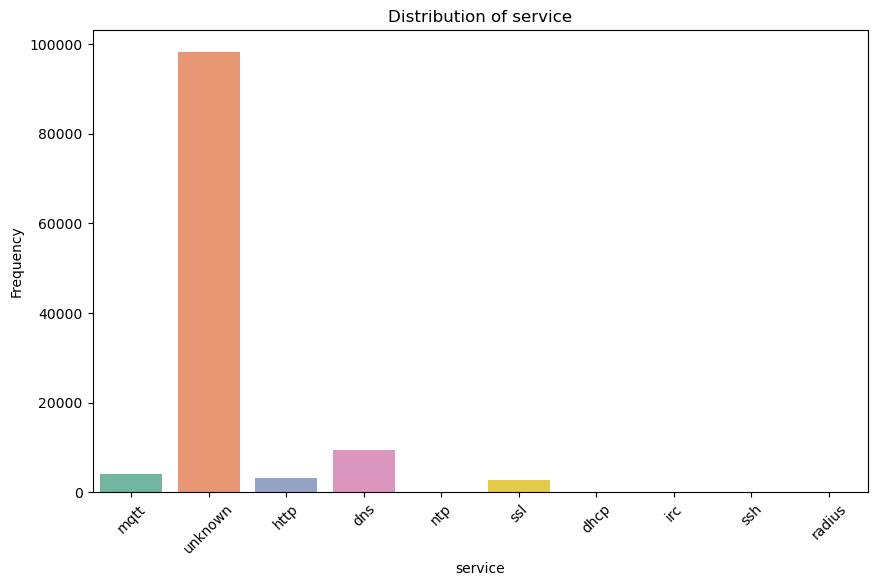

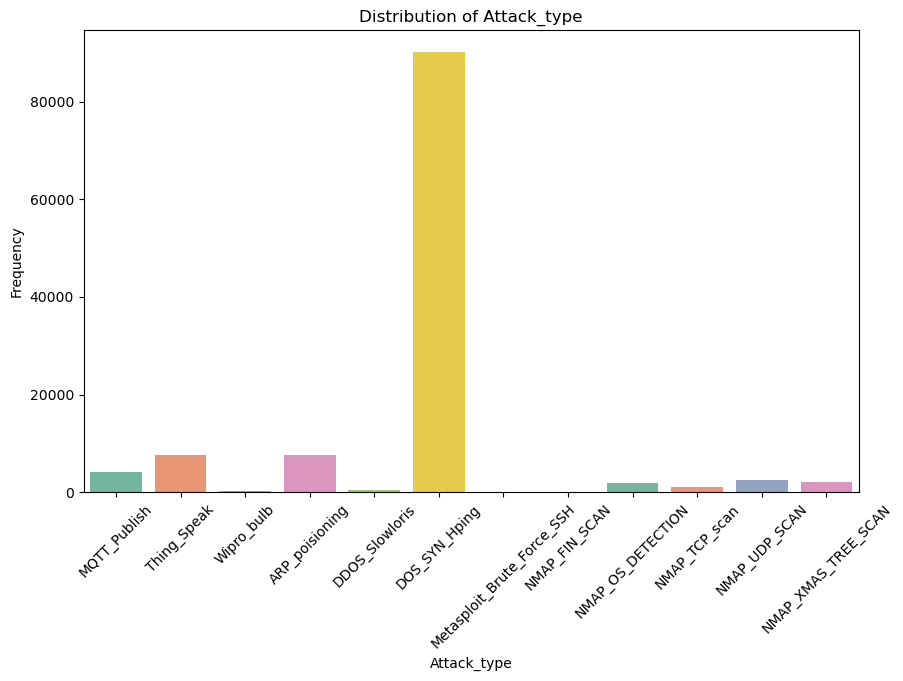

In [42]:
# plot categorical values of (Protocol, Service and Attack_Type)
categories = ['proto', 'service', 'Attack_type']
for feature in categories:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df,palette ='Set2')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

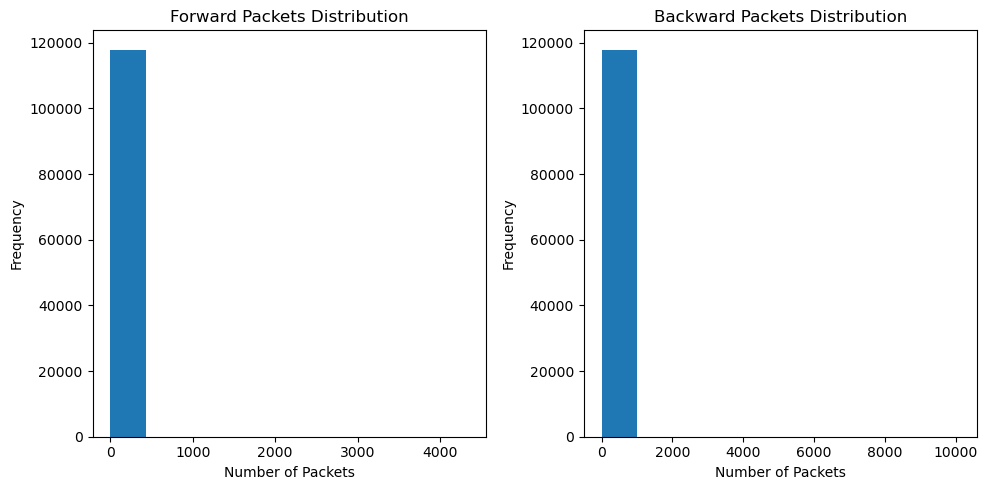

In [43]:
# distribution of packets counts

# Create the figure for plots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].hist(df['fwd_pkts_tot'])
axs[0].set_title('Forward Packets Distribution')
axs[0].set_xlabel('Number of Packets')
axs[0].set_ylabel('Frequency')

axs[1].hist(df['bwd_pkts_tot'])
axs[1].set_title('Backward Packets Distribution')
axs[1].set_xlabel('Number of Packets')
axs[1].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

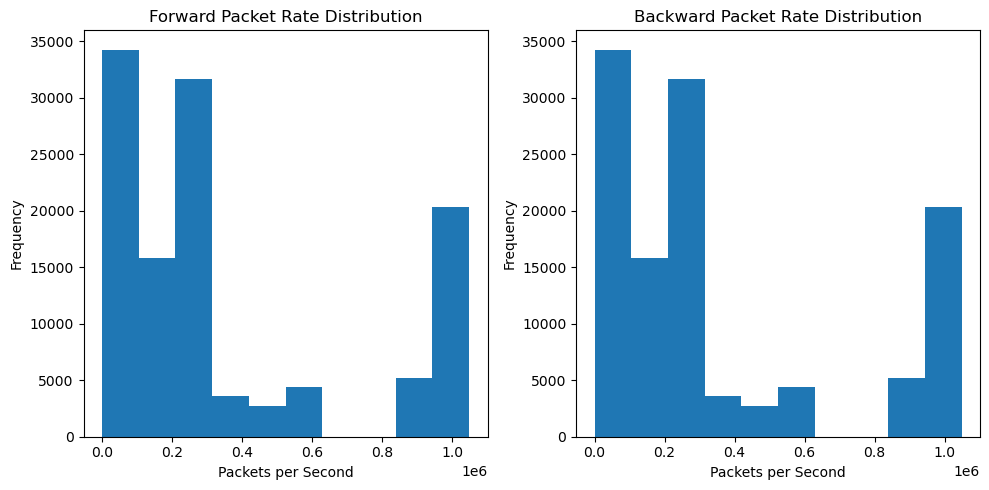

In [44]:
# display distribution of packet sizes
# Create the figure for plots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))


axs[0].hist(df['fwd_pkts_per_sec'])
axs[0].set_title('Forward Packet Rate Distribution')
axs[0].set_xlabel('Packets per Second')
axs[0].set_ylabel('Frequency')

axs[1].hist(df['bwd_pkts_per_sec'])
axs[1].set_title('Backward Packet Rate Distribution')
axs[1].set_xlabel('Packets per Second')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [45]:
dfc = df.copy()

In [46]:
dfc.head()

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,0.281148,...,0.0,29729182.96,29729182.96,29729182.96,29729182.96,0.0,64240,26847,502,MQTT_Publish
1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,0.282277,...,0.0,29855277.06,29855277.06,29855277.06,29855277.06,0.0,64240,26847,502,MQTT_Publish
2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,0.280164,...,0.0,29842149.02,29842149.02,29842149.02,29842149.02,0.0,64240,26847,502,MQTT_Publish
3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,0.281593,...,0.0,29913774.97,29913774.97,29913774.97,29913774.97,0.0,64240,26847,502,MQTT_Publish
4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,0.282111,...,0.0,29814704.90,29814704.90,29814704.90,29814704.90,0.0,64240,26847,502,MQTT_Publish


<h1 style="color: brown; text-align: left; font-size: 25px;"> Feature Engineering </b></h1>

Feature engineering is the process of creating, transforming, or selecting features (input variables) to improve a machine learning model's performance. It involves domain knowledge, creativity, and data preprocessing to extract useful patterns and relationships.



<h1 style="color: DodgerBlue; text-align: left; font-size: 20px;"> Encoding Proto and Service Columns

In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

encoded_cols = ['proto', 'service']
for col in encoded_cols:
    dfc[col] = le.fit_transform(dfc[col]) 

In [50]:
dfc.head()

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,38667,1883,1,4,32.011598,9,5,3,3,0.281148,...,0.0,29729182.96,29729182.96,29729182.96,29729182.96,0.0,64240,26847,502,MQTT_Publish
1,51143,1883,1,4,31.883584,9,5,3,3,0.282277,...,0.0,29855277.06,29855277.06,29855277.06,29855277.06,0.0,64240,26847,502,MQTT_Publish
2,44761,1883,1,4,32.124053,9,5,3,3,0.280164,...,0.0,29842149.02,29842149.02,29842149.02,29842149.02,0.0,64240,26847,502,MQTT_Publish
3,60893,1883,1,4,31.961063,9,5,3,3,0.281593,...,0.0,29913774.97,29913774.97,29913774.97,29913774.97,0.0,64240,26847,502,MQTT_Publish
4,51087,1883,1,4,31.902362,9,5,3,3,0.282111,...,0.0,29814704.90,29814704.90,29814704.90,29814704.90,0.0,64240,26847,502,MQTT_Publish


<h1 style="color: DodgerBlue; text-align: left; font-size: 20px;"> Correlation

Correlation measures the statistical relationship between two numerical variables. It quantifies how one variable changes in response to another.

- Range: Correlation values range from -1 to +1:

- +1 → Perfect positive correlation (when one increases, the other increases).

- 0 → No correlation (no relationship between variables).

- -1 → Perfect negative correlation (when one increases, the other decreases).



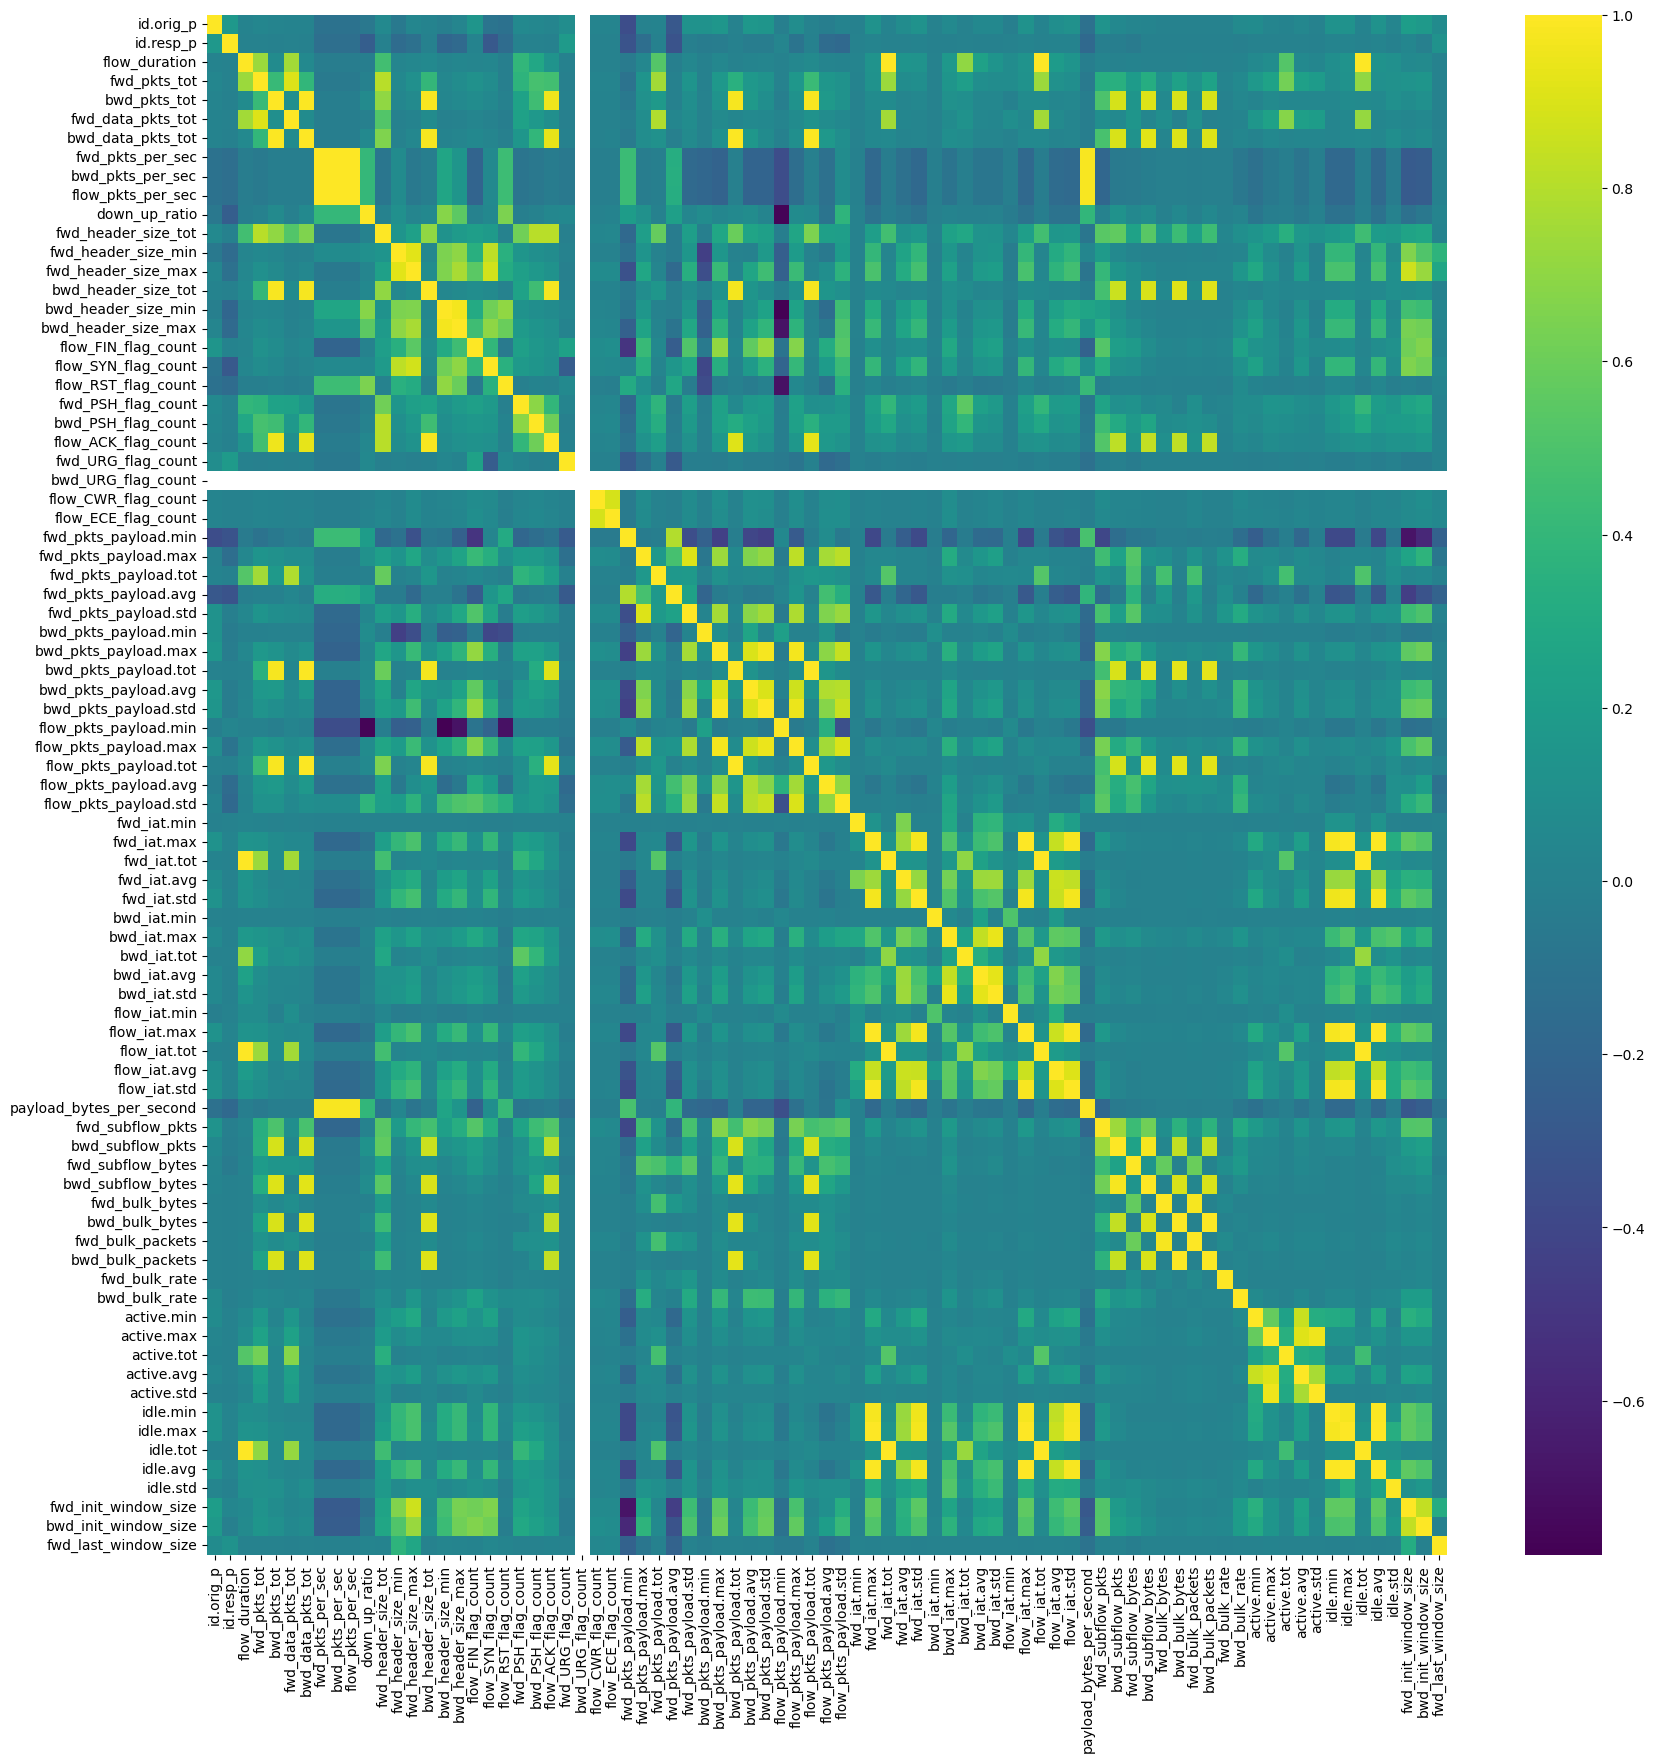

In [52]:
numeric_columns = df.select_dtypes(include=[np.number]) 

# Calculate the correlation matrix
correlation = numeric_columns.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation, annot=False, cmap='viridis')
plt.show()

The figure you uploaded is a correlation heatmap, which visually represents the correlation coefficients between multiple variables.

### Key Observations in the Heatmap:

- Diagonal Line (Yellow, Value = 1) - Each variable is perfectly correlated with itself (correlation = 1).

- Bright Yellow Blocks (High Positive Correlation, ~1) - Variables with a strong positive relationship.

- Dark Purple/Blue Areas (Negative Correlation, ~-1) - Variables with an inverse relationship.

- Greenish Areas (~0 Correlation) - Little to no correlation.

In [53]:
correlation

,id.orig_p,id.resp_p,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
id.orig_p,1.000000,0.171761,0.019775,0.039821,0.020819,0.017117,0.017666,-0.106325,-0.106415,-0.106370,...,0.047875,0.003046,0.120703,0.120557,0.019188,0.121316,0.028134,0.203511,0.176440,0.072560
id.resp_p,0.171761,1.000000,0.011463,0.004159,-0.004410,0.000474,-0.001583,-0.137184,-0.137178,-0.137182,...,0.004693,-0.000904,0.021520,0.020911,0.011326,0.021229,-0.000261,0.035737,-0.012439,0.131367
flow_duration,0.019775,0.011463,1.000000,0.734191,0.069944,0.751761,0.056863,-0.028385,-0.028378,-0.028382,...,0.059910,0.041116,0.095327,0.138066,0.996417,0.125172,0.108764,0.060341,0.063771,0.003121
fwd_pkts_tot,0.039821,0.004159,0.734191,1.000000,0.419241,0.909437,0.390701,-0.055210,-0.055231,-0.055221,...,0.222374,0.191264,0.089168,0.122648,0.708176,0.108529,0.116908,0.136716,0.151873,0.007218
bwd_pkts_tot,0.020819,-0.004410,0.069944,0.419241,1.000000,0.097242,0.992968,-0.026466,-0.026454,-0.026460,...,0.045342,0.042437,0.043038,0.069994,0.069164,0.058535,0.106644,0.079263,0.104093,0.012619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
idle.avg,0.121316,0.021229,0.125172,0.108529,0.058535,0.040649,0.046174,-0.178877,-0.178835,-0.178857,...,0.206309,0.023348,0.992808,0.995066,0.127307,1.000000,0.242983,0.560108,0.500829,-0.001562
idle.std,0.028134,-0.000261,0.108764,0.116908,0.106644,0.051956,0.093562,-0.040133,-0.040123,-0.040128,...,0.026201,0.042512,0.136652,0.326826,0.111342,0.242983,1.000000,0.116548,0.164856,0.003729
fwd_init_window_size,0.203511,0.035737,0.060341,0.136716,0.079263,0.037330,0.054005,-0.276209,-0.276571,-0.276391,...,0.245546,0.030968,0.557861,0.555594,0.059067,0.560108,0.116548,1.000000,0.835854,0.316520
bwd_init_window_size,0.176440,-0.012439,0.063771,0.151873,0.104093,0.048706,0.072814,-0.262269,-0.262213,-0.262242,...,0.218343,0.049346,0.490888,0.502203,0.062752,0.500829,0.164856,0.835854,1.000000,-0.002448


In [54]:
X = dfc.drop(columns=['Attack_type'])  
y = dfc['Attack_type']

In [55]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117922 entries, 0 to 123116
Data columns (total 84 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id.orig_p                 117922 non-null  int64  
 1   id.resp_p                 117922 non-null  int64  
 2   proto                     117922 non-null  int32  
 3   service                   117922 non-null  int32  
 4   flow_duration             117922 non-null  float64
 5   fwd_pkts_tot              117922 non-null  int64  
 6   bwd_pkts_tot              117922 non-null  int64  
 7   fwd_data_pkts_tot         117922 non-null  int64  
 8   bwd_data_pkts_tot         117922 non-null  int64  
 9   fwd_pkts_per_sec          117922 non-null  float64
 10  bwd_pkts_per_sec          117922 non-null  float64
 11  flow_pkts_per_sec         117922 non-null  float64
 12  down_up_ratio             117922 non-null  float64
 13  fwd_header_size_tot       117922 non-null  int64 

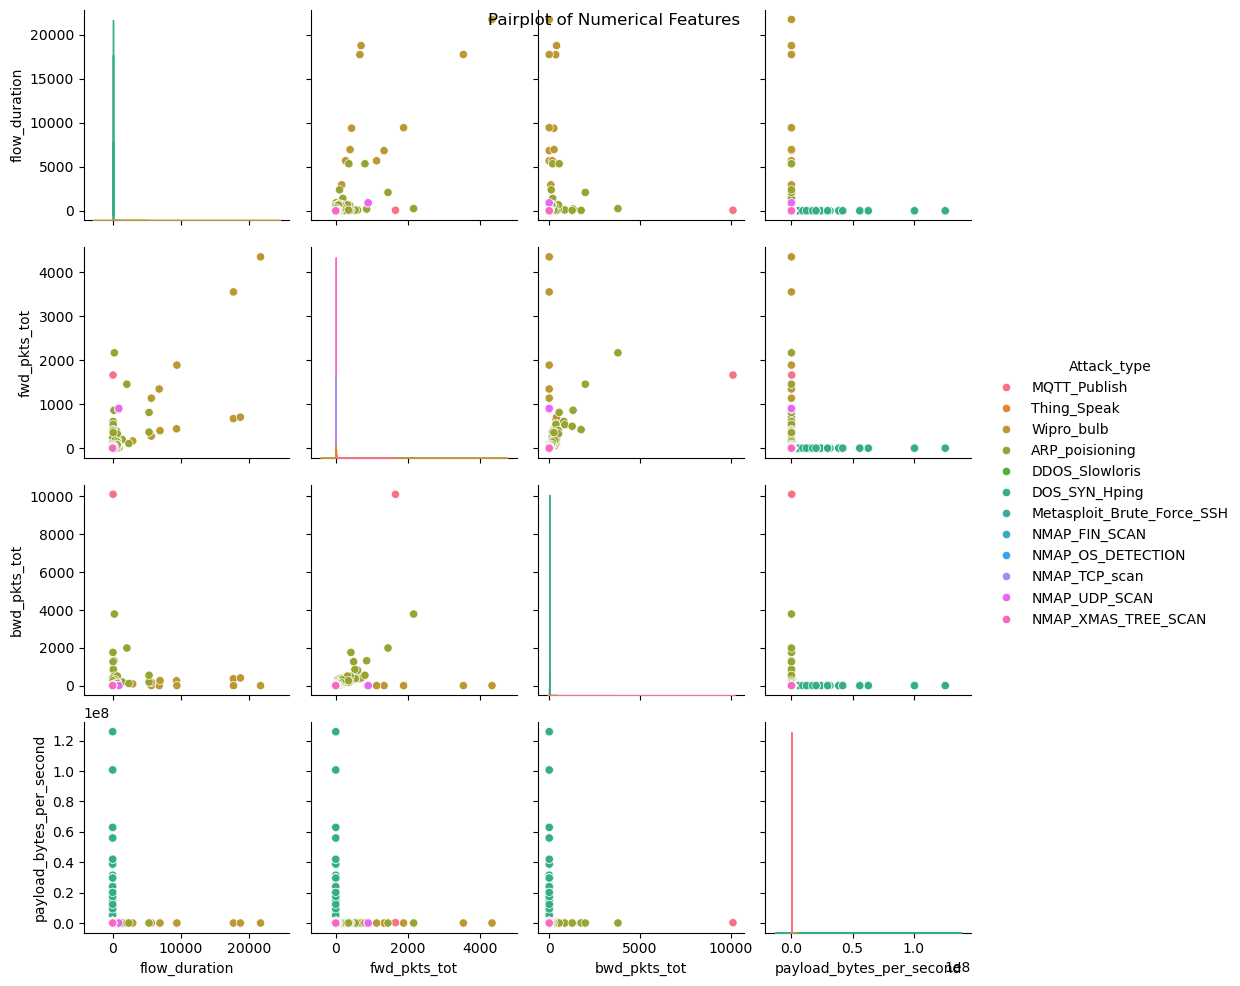

In [56]:
sns.pairplot(dfc[['flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'payload_bytes_per_second', 'Attack_type']], hue='Attack_type')
plt.suptitle('Pairplot of Numerical Features')
plt.show()

### Key Observations:

#### Attack Classification by Traffic Patterns:

DOS_SYN_Hping (green dots): Characterized by very high payload bytes per second (up to 1.3×10⁸) but low packet counts and short flow durations
MQTT_Publish (pink dots): Shows extremely high backward packet counts (around 10,000) but relatively low forward packets
Wipro_bulb (gold/brown dots): Shows instances with very high flow durations (15,000-20,000) and high forward packet counts


#### Flow Duration Patterns:

Most attacks have short flow durations except for Wipro_bulb attacks
DOS_SYN_Hping attacks consistently have very short durations
The first panel shows an extreme outlier in flow duration (green vertical line)


#### Packet Distribution:

Forward vs backward packet counts vary significantly by attack type
NMAP scans (various shades of blue/purple) typically have low packet counts in both directions
ARP_poisioning (light green) shows moderate packet counts


#### Payload Characteristics:

DOS_SYN_Hping attacks show a distinct pattern with high payload bytes per second
Most other attacks have very low payload bytes per second
The rightmost column shows clear separation between DOS_SYN_Hping and all other attack types


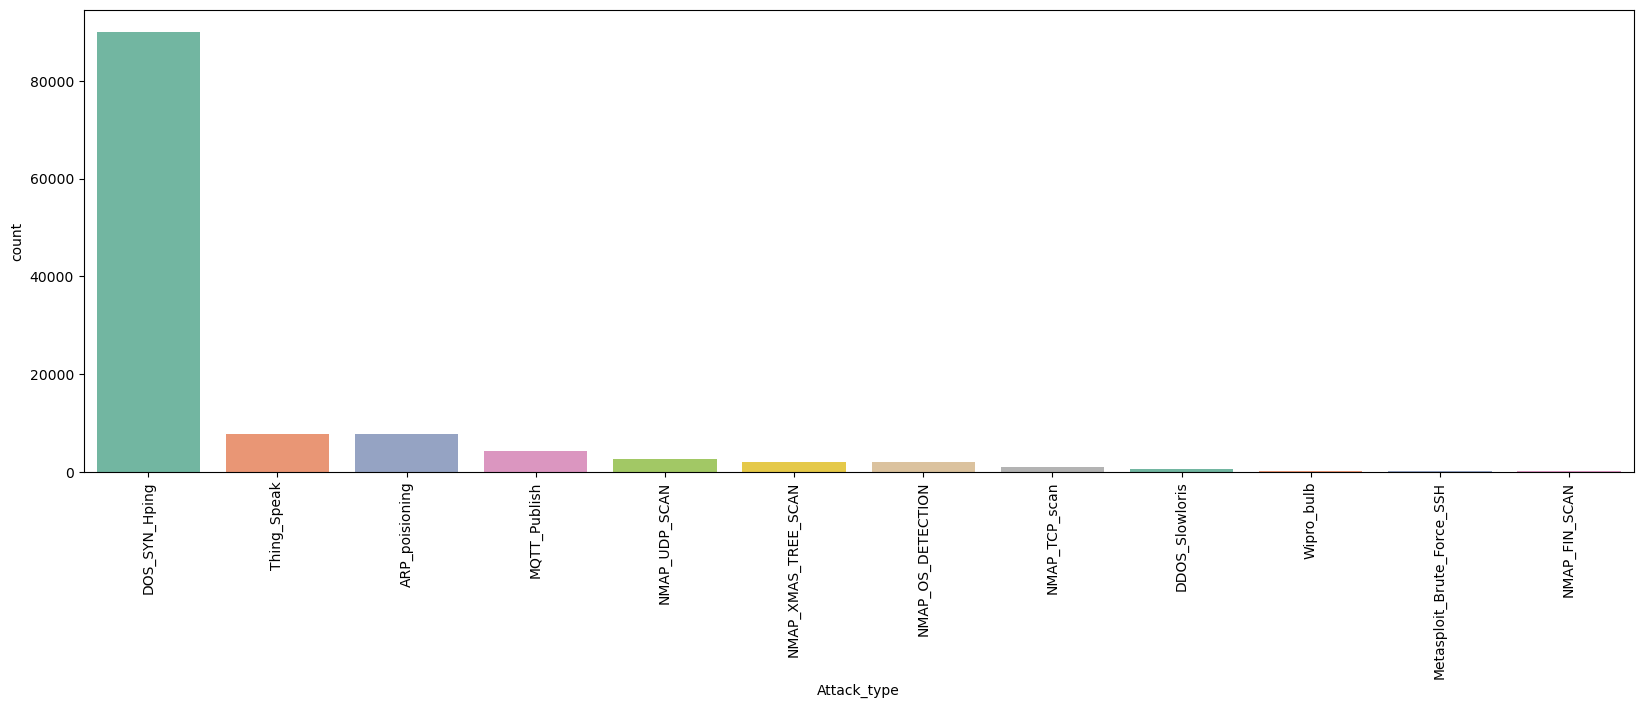

In [58]:
figure = plt.subplots(figsize=(20,6))
sns.countplot(data=df,x=df['Attack_type'],order=df['Attack_type'].value_counts().index,palette ='Set2')
plt.xticks(rotation=90)
plt.show()

<h1 style="color: green; text-align: left; font-size: 15px;"> Found High imbalance in DOS_SYN_Hping attack</h1> 

In [60]:
# find numerical cols 
num_cols = dfc.select_dtypes(include = "number")
num_cols

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
0,38667,1883,1,4,32.011598,9,5,3,3,0.281148,...,2.282415e+06,0.0,29729182.96,29729182.96,29729182.96,29729182.96,0.0,64240,26847,502
1,51143,1883,1,4,31.883584,9,5,3,3,0.282277,...,2.028307e+06,0.0,29855277.06,29855277.06,29855277.06,29855277.06,0.0,64240,26847,502
2,44761,1883,1,4,32.124053,9,5,3,3,0.280164,...,2.281904e+06,0.0,29842149.02,29842149.02,29842149.02,29842149.02,0.0,64240,26847,502
3,60893,1883,1,4,31.961063,9,5,3,3,0.281593,...,2.047288e+06,0.0,29913774.97,29913774.97,29913774.97,29913774.97,0.0,64240,26847,502
4,51087,1883,1,4,31.902362,9,5,3,3,0.282111,...,2.087657e+06,0.0,29814704.90,29814704.90,29814704.90,29814704.90,0.0,64240,26847,502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123112,59247,63331,1,9,0.000006,1,1,0,0,167772.160000,...,5.960464e+00,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024
123113,59247,64623,1,9,0.000007,1,1,0,0,144631.172400,...,6.914139e+00,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024
123114,59247,64680,1,9,0.000006,1,1,0,0,167772.160000,...,5.960464e+00,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024
123115,59247,65000,1,9,0.000006,1,1,0,0,167772.160000,...,5.960464e+00,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024


<h1 style="color: brown; text-align: left; font-size: 25px;"> Handling Outliers </b></h1>

Outliers are extreme values in a dataset that deviate significantly from the majority of the data points. Handling them is crucial because they can negatively impact statistical analysis and machine learning models.Boxplots are used to detect presence of outliers.

### Why Handle Outliers?
* Improves Model Accuracy
* Enhances Data Quality
* Prevents Biased Statistical Analysis
* Avoids Misleading Visualizations
* Improves Machine Learning Model Performance


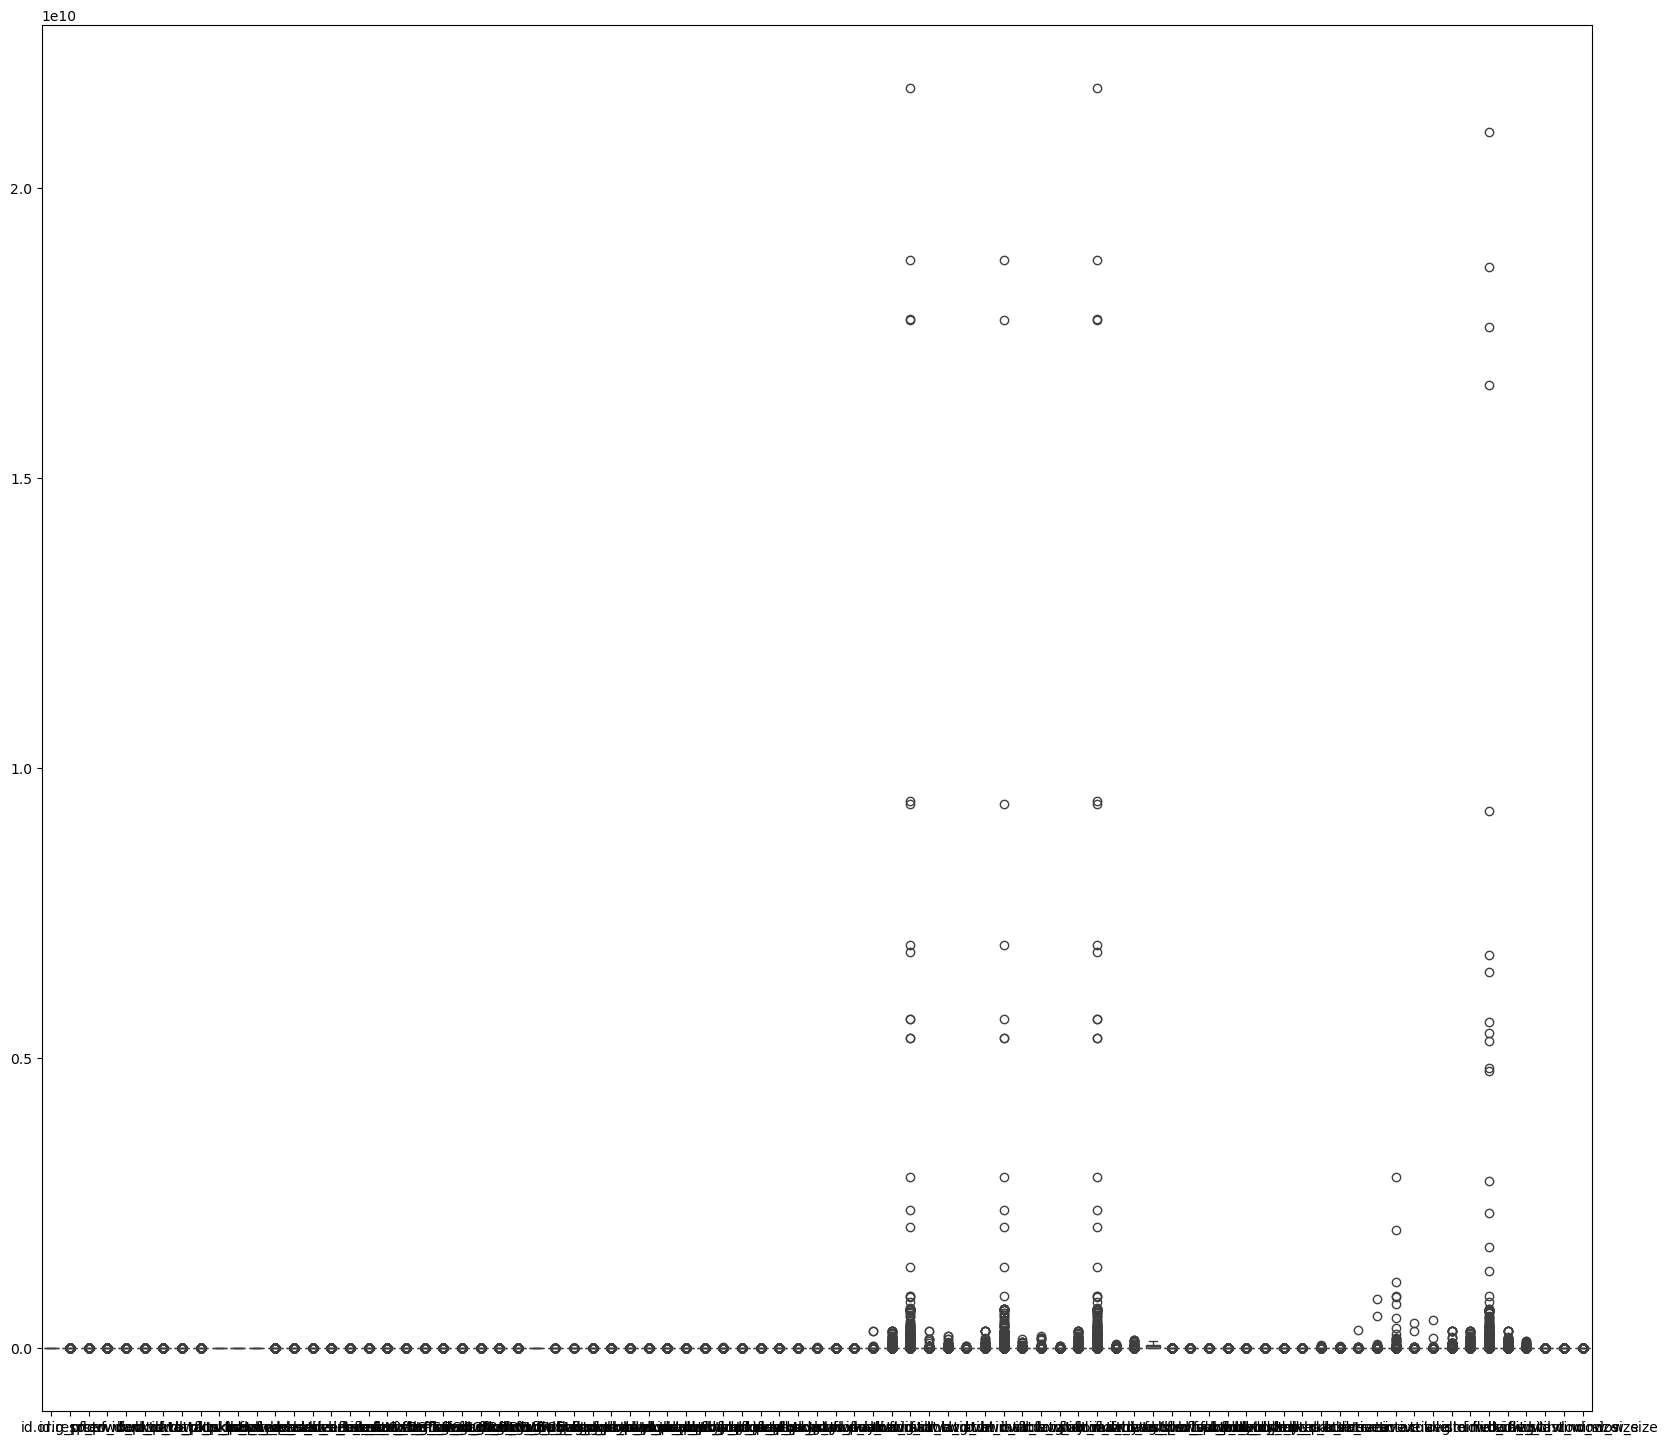

In [62]:
plt.figure(figsize = (20,18))
sns.boxplot(dfc)
plt.show()

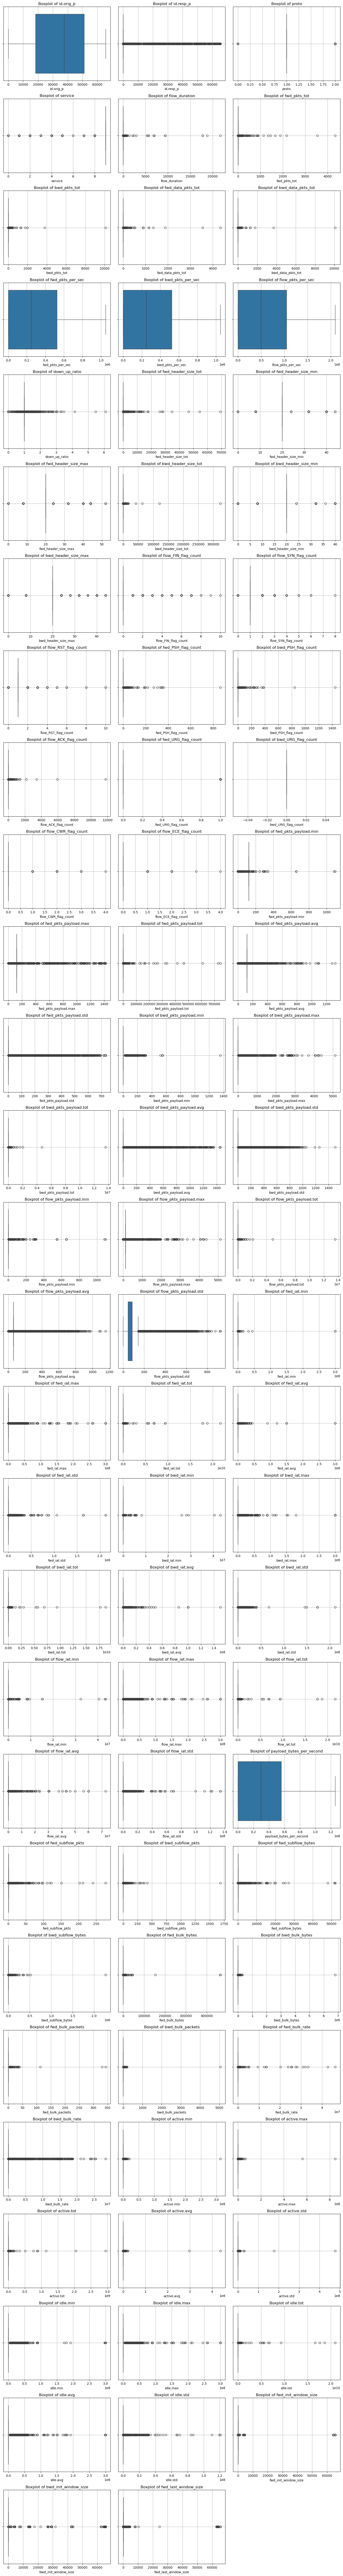

In [63]:
num_features = len(num_cols.columns)
rows = math.ceil(num_features / 3)  # Arrange plots in rows of 3

fig, axes = plt.subplots(rows, 3, figsize=(15, 4 * rows))
axes = axes.flatten()  # Flatten in case of uneven grid

for i, col in enumerate(num_cols.columns):
    sns.boxplot(data=dfc, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].grid(True)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<h1 style="color: DodgerBlue; text-align: left; font-size: 20px;"> Using IQR Method to Handle Outliers

In [65]:
def handling_outliers(df):
    for col in df.select_dtypes(include = "number").columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3-Q1
        
        Lower_bound = Q1 - (1.5 * IQR) 
        Upper_bound = Q3 + (1.5 * IQR)

        df[col] = df[col].apply(lambda x: Lower_bound if x < Lower_bound else Upper_bound if x > Upper_bound else x)

    return(df)

In [66]:
df1 = handling_outliers(dfc)

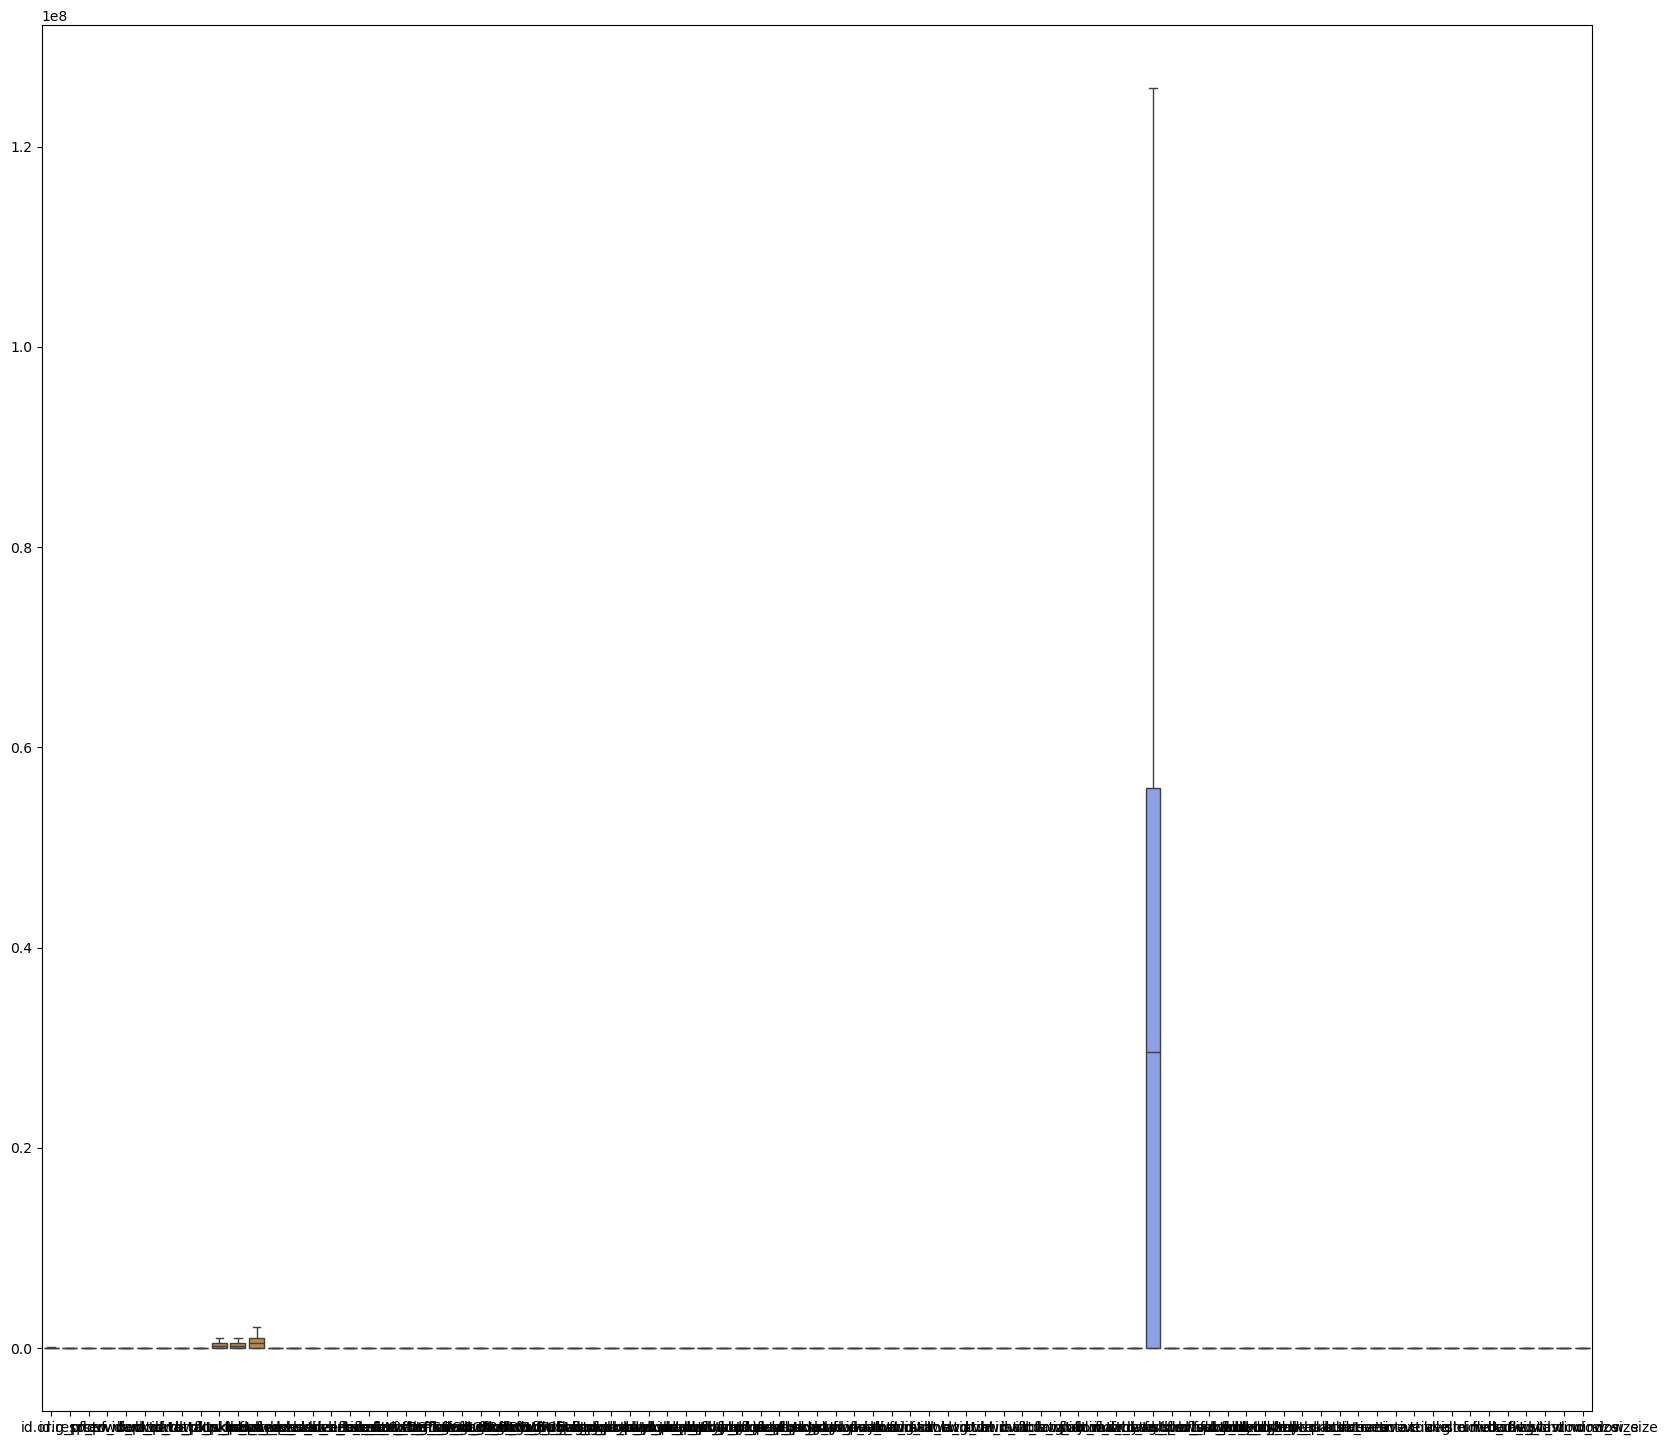

In [67]:
plt.figure(figsize = (20,18))
sns.boxplot(df1)
plt.show()

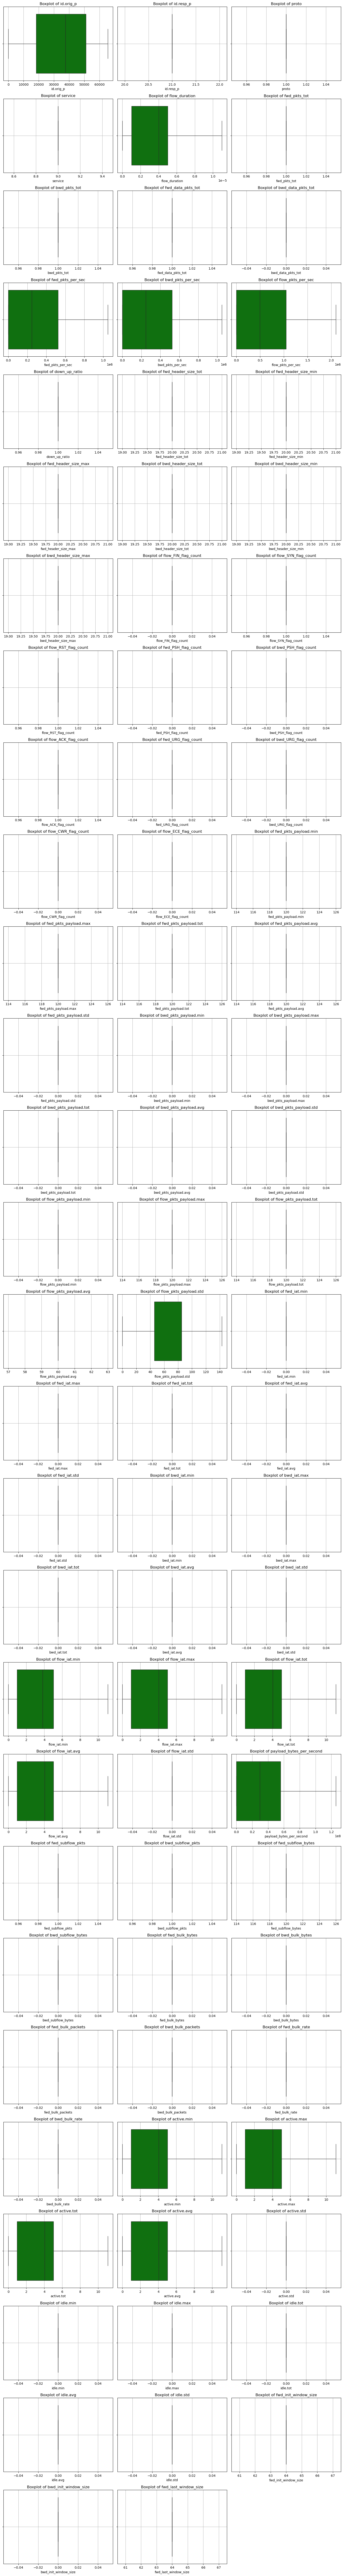

In [68]:
num_features = len(num_cols.columns)
rows = math.ceil(num_features / 3)  # Arrange plots in rows of 3

fig, axes = plt.subplots(rows, 3, figsize=(15, 4 * rows))
axes = axes.flatten()  # Flatten in case of uneven grid

for i, col in enumerate(num_cols.columns):
    sns.boxplot(data=df1, x=col, ax=axes[i],color = 'green')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].grid(True)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<h1 style="color: brown; text-align: left; font-size: 25px;"> Checking Skew and Kurtosis </b></h1>

Skewness and Kurtosis are two statistical measures that describe the shape of a distribution in relation to a normal distribution.

* Skewness tells us about the asymmetry of data.
* Kurtosis tells us about the presence of extreme values.

In [70]:
df1.select_dtypes(include = 'number').skew()

id.orig_p              -0.253417
id.resp_p               0.000000
proto                   0.000000
service                 0.000000
flow_duration           0.932772
                          ...   
idle.avg                0.000000
idle.std                0.000000
fwd_init_window_size    0.000000
bwd_init_window_size    0.000000
fwd_last_window_size    0.000000
Length: 83, dtype: float64

<h1 style="color: green; text-align: left; font-size: 15px;"> No Skew found </h1>

In [72]:
df1.select_dtypes(include = 'number').kurtosis()

id.orig_p              -1.165385
id.resp_p               0.000000
proto                   0.000000
service                 0.000000
flow_duration          -0.198781
                          ...   
idle.avg                0.000000
idle.std                0.000000
fwd_init_window_size    0.000000
bwd_init_window_size    0.000000
fwd_last_window_size    0.000000
Length: 83, dtype: float64

In [73]:
numerical_features = df1.select_dtypes(include=['int64','float64']).columns
numerical_features

Index(['id.orig_p', 'id.resp_p', 'proto', 'service', 'flow_duration',
       'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
       '

<h1 style="color: brown; text-align: left; font-size: 25px;"> Feature Selection </b></h1>

Feature selection is the process of choosing the most relevant features (input variables) from a dataset to improve the performance of a machine learning model. It helps in reducing dimensionality, improving model efficiency, and preventing overfitting.

- mutual_info_classif estimates the mutual information between each feature and the target.

- SelectKBest selects the top k=30 features based on the highest mutual information scores.

- The get_support(indices=True) method retrieves the indices of the selected features.

In [75]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [76]:
# Calculate mutual information scores
sk = SelectKBest(mutual_info_classif, k= 30)

In [77]:
X_new = sk.fit_transform(X,y)

In [78]:
selected_features = X.columns[sk.get_support()]
feature_score = pd.DataFrame({'feature':X.columns,'Score':sk.scores_}).sort_values(by='Score',ascending=False)
print("selected_Fetaures:",selected_features)
print("\nFeature Score:")
print(feature_score)

selected_Fetaures: Index(['id.resp_p', 'service', 'flow_duration', 'fwd_data_pkts_tot',
       'fwd_pkts_per_sec', 'bwd_pkts_per_sec', 'flow_pkts_per_sec',
       'fwd_header_size_tot', 'fwd_header_size_max', 'bwd_header_size_tot',
       'flow_SYN_flag_count', 'fwd_pkts_payload.min', 'fwd_pkts_payload.max',
       'fwd_pkts_payload.tot', 'fwd_pkts_payload.avg', 'flow_pkts_payload.max',
       'flow_pkts_payload.tot', 'flow_pkts_payload.avg',
       'flow_pkts_payload.std', 'flow_iat.max', 'flow_iat.tot', 'flow_iat.avg',
       'payload_bytes_per_second', 'fwd_subflow_bytes', 'active.min',
       'active.max', 'active.tot', 'active.avg', 'fwd_init_window_size',
       'fwd_last_window_size'],
      dtype='object')

Feature Score:
                  feature     Score
32   fwd_pkts_payload.avg  0.879554
30   fwd_pkts_payload.max  0.874284
62      fwd_subflow_bytes  0.868001
41  flow_pkts_payload.tot  0.865618
31   fwd_pkts_payload.tot  0.862839
..                    ...       ...
68      

In [79]:
X_selected = X[selected_features]
X_selected.columns

Index(['id.resp_p', 'service', 'flow_duration', 'fwd_data_pkts_tot',
       'fwd_pkts_per_sec', 'bwd_pkts_per_sec', 'flow_pkts_per_sec',
       'fwd_header_size_tot', 'fwd_header_size_max', 'bwd_header_size_tot',
       'flow_SYN_flag_count', 'fwd_pkts_payload.min', 'fwd_pkts_payload.max',
       'fwd_pkts_payload.tot', 'fwd_pkts_payload.avg', 'flow_pkts_payload.max',
       'flow_pkts_payload.tot', 'flow_pkts_payload.avg',
       'flow_pkts_payload.std', 'flow_iat.max', 'flow_iat.tot', 'flow_iat.avg',
       'payload_bytes_per_second', 'fwd_subflow_bytes', 'active.min',
       'active.max', 'active.tot', 'active.avg', 'fwd_init_window_size',
       'fwd_last_window_size'],
      dtype='object')

<h1 style="color: brown; text-align: left; font-size: 25px;"> Scaling </b></h1>

Scaling is the process of transforming numerical features so they have a consistent range or distribution. It helps machine learning models perform better by preventing features with larger values from dominating those with smaller values.


In [81]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_selected)
x_scaled

array([[ 0.15512826, -1.57070219,  0.22196051, ...,  1.29343097,
         3.069373  , -0.03815473],
       [ 0.15512826, -1.57070219,  0.22095303, ...,  1.13910959,
         3.069373  , -0.03815473],
       [ 0.15512826, -1.57070219,  0.22284554, ...,  1.29312068,
         3.069373  , -0.03815473],
       ...,
       [11.86112808,  0.41337067, -0.0299729 , ..., -0.09269058,
        -0.27653551,  0.04546833],
       [11.92077934,  0.41337067, -0.0299729 , ..., -0.09269058,
        -0.27653551,  0.04546833],
       [11.94482625,  0.41337067, -0.0299729 , ..., -0.09269058,
        -0.27653551,  0.04546833]])

<h1 style="color: brown; text-align: left; font-size: 25px;"> Handling Imbalance Data </b></h1>

<h1 style="color: green; text-align: left; font-size: 15px;"> Performing undersampling on DOS_SYN_Hping Attack Type using SMOTE </h1>

#### SMOTE stands for Synthetic Minority Over-sampling Technique. 🚀

It is an oversampling method that generates synthetic samples for the minority class instead of simply duplicating existing ones. This helps in balancing the dataset and improving model performance on imbalanced classification tasks.

- Handling imbalanced data is crucial when training machine learning models, as class imbalance can lead to biased predictions favoring the majority class. In the RT-IoT2022 dataset, the DOS_SYN_Hping attack is significantly overrepresented compared to other attack types, making undersampling a necessary step.


In [83]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [84]:
X = dfc.drop(columns=['Attack_type'])  
y = dfc['Attack_type']

In [85]:
# Step 1: Find the minimum class size
min_class_count = min(Counter(y).values())

# Step 2: Undersample DOS_SYN_Hping to match the minority class count
undersample = RandomUnderSampler(sampling_strategy={'DOS_SYN_Hping': min_class_count}, random_state=42)

# Step 3: Apply SMOTE to oversample all other classes to match this count
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Step 4: Apply undersampling & oversampling together
X_train_under, y_train_under = undersample.fit_resample(X, y)
X_resampled, y_resampled = smote.fit_resample(X_train_under, y_train_under)

# Step 5: Print new class distribution
print("Balanced class distribution:", Counter(y_resampled))

Balanced class distribution: Counter({'ARP_poisioning': 7654, 'DDOS_Slowloris': 7654, 'DOS_SYN_Hping': 7654, 'MQTT_Publish': 7654, 'Metasploit_Brute_Force_SSH': 7654, 'NMAP_FIN_SCAN': 7654, 'NMAP_OS_DETECTION': 7654, 'NMAP_TCP_scan': 7654, 'NMAP_UDP_SCAN': 7654, 'NMAP_XMAS_TREE_SCAN': 7654, 'Thing_Speak': 7654, 'Wipro_bulb': 7654})


In [86]:
print('Original unbalanced dataset shape', len(dfc))
print('Resampled balanced dataset shape', len(y_resampled))

Original unbalanced dataset shape 117922
Resampled balanced dataset shape 91848


In [87]:
balanced_df = pd.DataFrame(X_resampled, columns=list(i for i in list(dfc.describe(include='all').columns) if i != 'Attack_type'))

In [88]:
dfc.shape

(117922, 84)

In [89]:
balanced_df.shape

(91848, 83)

In [90]:
y.value_counts()

Attack_type
DOS_SYN_Hping                 90089
Thing_Speak                    7654
ARP_poisioning                 7625
MQTT_Publish                   4142
NMAP_UDP_SCAN                  2584
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  533
Wipro_bulb                      219
Metasploit_Brute_Force_SSH       36
NMAP_FIN_SCAN                    28
Name: count, dtype: int64

In [91]:
y_resampled.value_counts()

Attack_type
ARP_poisioning                7654
DDOS_Slowloris                7654
DOS_SYN_Hping                 7654
MQTT_Publish                  7654
Metasploit_Brute_Force_SSH    7654
NMAP_FIN_SCAN                 7654
NMAP_OS_DETECTION             7654
NMAP_TCP_scan                 7654
NMAP_UDP_SCAN                 7654
NMAP_XMAS_TREE_SCAN           7654
Thing_Speak                   7654
Wipro_bulb                    7654
Name: count, dtype: int64

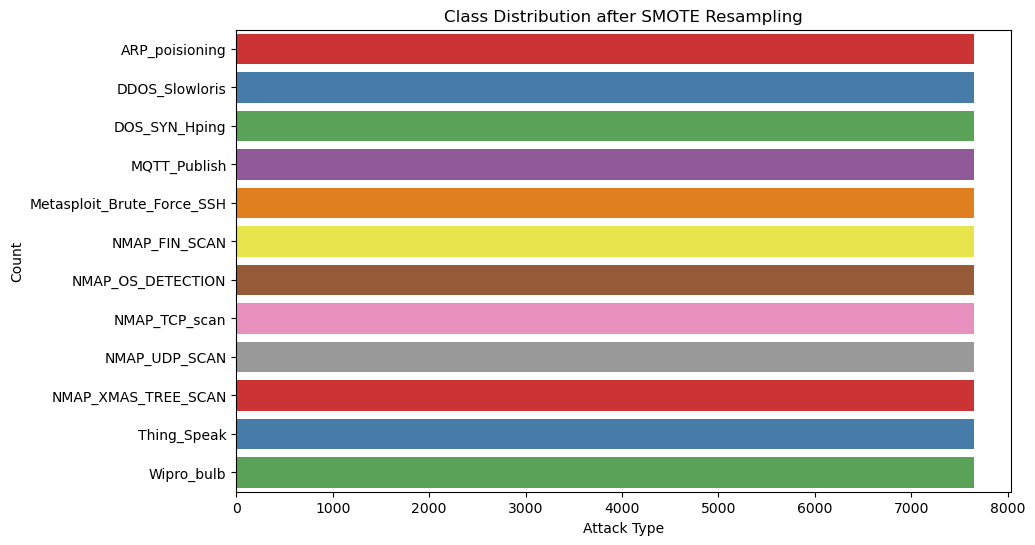

In [92]:
plt.figure(figsize=(10, 6))
sns.countplot(y_resampled, palette ='Set1')
plt.title('Class Distribution after SMOTE Resampling')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.show()

In [93]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91848 entries, 0 to 91847
Data columns (total 83 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id.orig_p                 91848 non-null  int64  
 1   id.resp_p                 91848 non-null  float64
 2   proto                     91848 non-null  float64
 3   service                   91848 non-null  float64
 4   flow_duration             91848 non-null  float64
 5   fwd_pkts_tot              91848 non-null  float64
 6   bwd_pkts_tot              91848 non-null  float64
 7   fwd_data_pkts_tot         91848 non-null  float64
 8   bwd_data_pkts_tot         91848 non-null  float64
 9   fwd_pkts_per_sec          91848 non-null  float64
 10  bwd_pkts_per_sec          91848 non-null  float64
 11  flow_pkts_per_sec         91848 non-null  float64
 12  down_up_ratio             91848 non-null  float64
 13  fwd_header_size_tot       91848 non-null  float64
 14  fwd_he

In [94]:
balanced_df.describe()

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
count,91848.000000,91848.0,91848.0,91848.0,91848.000000,91848.0,91848.0,91848.0,91848.0,9.184800e+04,...,91848.000000,91848.0,91848.0,91848.0,91848.0,91848.0,91848.0,91848.0,91848.0,91848.0
mean,46633.226505,21.0,1.0,9.0,0.000007,1.0,1.0,1.0,0.0,1.095307e+05,...,7.016248,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,64.0
std,11417.339461,0.0,0.0,0.0,0.000005,0.0,0.0,0.0,0.0,2.383548e+05,...,4.573757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,21.0,1.0,9.0,0.000000,1.0,1.0,1.0,0.0,0.000000e+00,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,64.0
25%,39355.000000,21.0,1.0,9.0,0.000002,1.0,1.0,1.0,0.0,2.281657e-01,...,2.126468,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,64.0
50%,49583.000000,21.0,1.0,9.0,0.000011,1.0,1.0,1.0,0.0,1.471472e+01,...,11.086464,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,64.0
75%,55086.250000,21.0,1.0,9.0,0.000011,1.0,1.0,1.0,0.0,1.446312e+05,...,11.086464,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,64.0
max,65446.000000,21.0,1.0,9.0,0.000011,1.0,1.0,1.0,0.0,1.048576e+06,...,11.086464,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,64.0


<h1 style="color: DodgerBlue; text-align: left; font-size: 20px;"> Checking for duplicates

In [96]:
balanced_df.duplicated().sum()

25109

In [97]:
balanced_df.drop_duplicates(inplace = True)

In [98]:
balanced_df.duplicated().sum()

0

<h1 style="color: green; text-align: left; font-size: 15px;"> Removed duplicates 

<h1 style="color: DodgerBlue; text-align: left; font-size: 20px;"> Checking for null values

In [101]:
balanced_df.isna().sum()

id.orig_p               0
id.resp_p               0
proto                   0
service                 0
flow_duration           0
                       ..
idle.avg                0
idle.std                0
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
Length: 83, dtype: int64

In [102]:
balanced_df.isnull().sum()

id.orig_p               0
id.resp_p               0
proto                   0
service                 0
flow_duration           0
                       ..
idle.avg                0
idle.std                0
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
Length: 83, dtype: int64

<h1 style="color: green; text-align: left; font-size: 15px;"> No null values detected

In [104]:
balanced_df.columns

Index(['id.orig_p', 'id.resp_p', 'proto', 'service', 'flow_duration',
       'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
       '

<h1 style="color: brown; text-align: left; font-size: 25px;"> Splitting Data </b></h1>

Splitting data is a crucial step in machine learning to ensure that a model can generalize well to unseen data. This process helps evaluate model performance and prevent overfitting (when a model memorizes training data instead of learning patterns).

In [106]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [107]:
print(f""" 
X_train shape : {x_train.shape}
X_test shape : {x_test.shape}
y_train shape : {y_train.shape}
y_test shape : {y_test.shape} 
""")

 
X_train shape : (73478, 83)
X_test shape : (18370, 83)
y_train shape : (73478,)
y_test shape : (18370,) 



<h1 style="color: brown; text-align: left; font-size: 25px;"> Fitting Top Features </b></h1>

In [109]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Calculate mutual information scores
selector = SelectKBest(mutual_info_classif, k='all')
selector.fit(x_train, y_train)

# Get mutual information scores
mutual_info_scores = selector.scores_

# Print mutual information scores
print("Mutual Information Scores:")
for feature, score in zip(x_train.columns, mutual_info_scores):
    print(f"{feature}: {score:.3f}")

# Sort mutual information scores in descending order
sorted_scores = sorted(zip(x_train.columns, mutual_info_scores), key=lambda x: x[1], reverse=True)

# Select top 30 features
top_30_features = [feature for feature, score in sorted_scores[:30]]

print("\nTop 30 Features:")
print(top_30_features)

Mutual Information Scores:
id.orig_p: 1.433
id.resp_p: 0.002
proto: 0.000
service: 0.000
flow_duration: 0.950
fwd_pkts_tot: 0.005
bwd_pkts_tot: 0.007
fwd_data_pkts_tot: 0.005
bwd_data_pkts_tot: 0.000
fwd_pkts_per_sec: 1.571
bwd_pkts_per_sec: 1.511
flow_pkts_per_sec: 1.570
down_up_ratio: 0.000
fwd_header_size_tot: 0.003
fwd_header_size_min: 0.005
fwd_header_size_max: 0.000
bwd_header_size_tot: 0.000
bwd_header_size_min: 0.003
bwd_header_size_max: 0.003
flow_FIN_flag_count: 0.000
flow_SYN_flag_count: 0.000
flow_RST_flag_count: 0.003
fwd_PSH_flag_count: 0.000
bwd_PSH_flag_count: 0.000
flow_ACK_flag_count: 0.002
fwd_URG_flag_count: 0.000
bwd_URG_flag_count: 0.002
flow_CWR_flag_count: 0.000
flow_ECE_flag_count: 0.000
fwd_pkts_payload.min: 0.003
fwd_pkts_payload.max: 0.000
fwd_pkts_payload.tot: 0.003
fwd_pkts_payload.avg: 0.001
fwd_pkts_payload.std: 0.004
bwd_pkts_payload.min: 0.003
bwd_pkts_payload.max: 0.000
bwd_pkts_payload.tot: 0.000
bwd_pkts_payload.avg: 0.000
bwd_pkts_payload.std: 0.00

<h1 style="color: brown; text-align: left; font-size: 25px;"> Model Building - Classification Models </b></h1>

### 1. Logistic Regression
* Used for binary classification (e.g., yes/no, 0/1).

* Works by calculating probabilities using a sigmoid curve.

* Best for simple problems with linearly separable data (straight-line decision boundary).

📌 Example: Predicting whether a customer will buy a product or not.

### Support Vector Classifier (SVC)
* Finds the best boundary (hyperplane) to separate classes.

* Works well in both linear and non-linear problems (with kernels).

* Good when data has clear class separation.

📌 Example: Face recognition systems.

### Decision Tree
* Works like a flowchart, making decisions based on feature conditions.

* Easy to understand but can overfit if not controlled.

* Best for rule-based classifications.

📌 Example: Deciding if a person qualifies for a loan.

### Random Forest Classifier
* A collection of multiple decision trees combined for better accuracy.

* Reduces overfitting and gives stable results.

* Works well with large datasets.

📌 Example: Fraud detection in banking.

### Gradient Boosting Classifier
* Improves weak models step by step, focusing on previous mistakes.

* More accurate than Random Forest but takes longer to train.

* Commonly used in competitions and advanced analytics.

📌 Example: Predicting customer churn.

### Naïve Bayes Classifier
* Based on Bayes’ Theorem, assumes all features are independent.

* Works well with text data and small datasets.

*Fast and efficient but not always the most accurate.

📌 Example: Spam email detection.

### MLP Classifier (Neural Network)
* A basic artificial neural network with multiple layers.

* Can learn complex patterns but requires a lot of data and computation.

* Used when simpler models don’t perform well.

📌 Example: Handwriting recognition (e.g., reading digits on checks).

In [112]:
Models = {
    '1.LogisticRegression' : LogisticRegression(),
    '2.SVC' : SVC(),
    '3.Decision Tree': DecisionTreeClassifier(),
    '4. Random Forest Classifier' : RandomForestClassifier(),
    '5.Gradient Boosting Classifier' : GradientBoostingClassifier(),
    '6. Naive Bayes Classifier ' : GaussianNB(),
    '7. MLP Classifier' : MLPClassifier()
}

In [113]:
# Select top 30 features
selector = SelectKBest(mutual_info_classif, k=30)
selector.fit(x_train, y_train)
X_train_selected = selector.transform(x_train)
X_test_selected = selector.transform(x_test)

<h1 style="color: brown; text-align: left; font-size: 25px;"> Model Evaluation

In [115]:
results = []
for name, model in Models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)

    # Extract metrics from classification report
    metrics = {
        'Model': name,
        'Accuracy': accuracy,
        'Precision': class_report['weighted avg']['precision'],
        'Recall': class_report['weighted avg']['recall'],
        'F1-Score': class_report['weighted avg']['f1-score']
    }
    results.append(metrics)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Sort the DataFrame by accuracy in descending order
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)

# Print the sorted DataFrame
(results_df_sorted)

,Model,Accuracy,Precision,Recall,F1-Score
4,5.Gradient Boosting Classifier,0.964671,0.964504,0.964671,0.964322
3,4. Random Forest Classifier,0.964290,0.964103,0.964290,0.964187
2,3.Decision Tree,0.961296,0.961097,0.961296,0.961182
6,7. MLP Classifier,0.444747,0.521570,0.444747,0.343411
5,6. Naive Bayes Classifier,0.392814,0.449337,0.392814,0.350443
0,1.LogisticRegression,0.311159,0.333337,0.311159,0.278013
1,2.SVC,0.269897,0.326016,0.269897,0.205511


### Top Performing Models

* Gradient Boosting Classifier (0.9646) – This model has the highest overall performance across all metrics, making it the best choice if you prioritize accuracy.

* Random Forest Classifier (0.9640) – A close second to Gradient Boosting, this model also performs well and may be more interpretable.
* Decision Tree (0.9612) – Performs slightly worse than Random Forest, which is expected since Random Forest is an ensemble of multiple decision trees.


<h1 style="color: brown; text-align: left; font-size: 25px;"> Confusion Matrix </b></h1>

A confusion matrix is a table used to evaluate the performance of a classification model. Each row represents instances of the actual (true) class, while each column represents instances of the predicted class.

#### How to Evaluate a Confusion Matrix

* True Positives (TP): Cases correctly predicted as positive
* True Negatives (TN): Cases correctly predicted as negative
* False Positives (FP): Negative cases incorrectly predicted as positive (Type I error)
* False Negatives (FN): Positive cases incorrectly predicted as negative (Type II error)


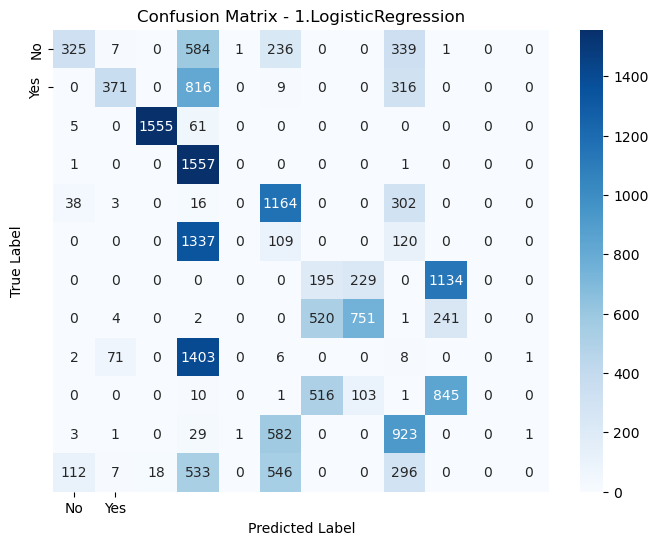

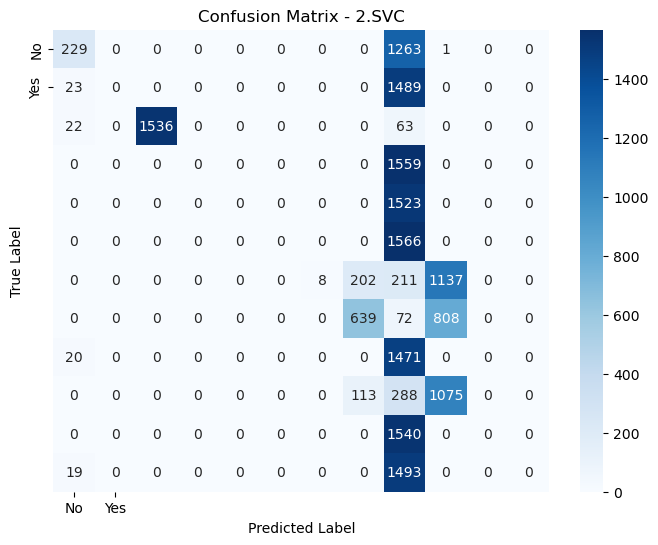

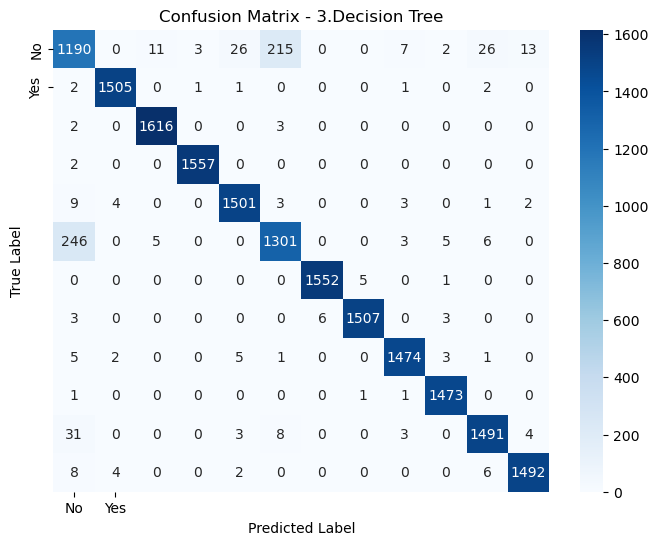

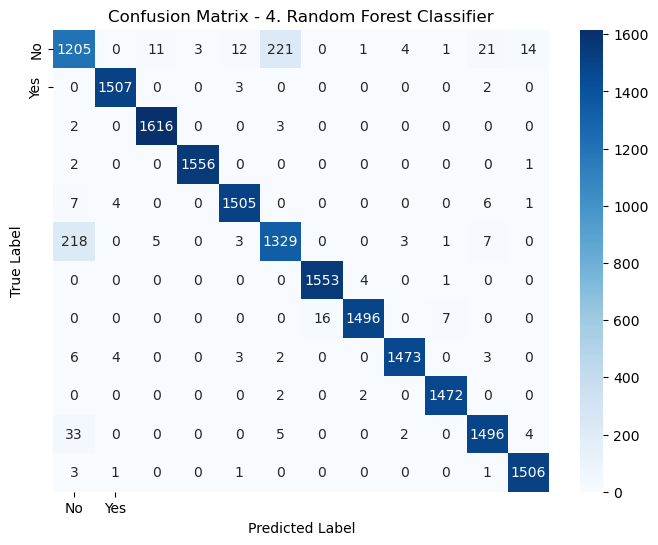

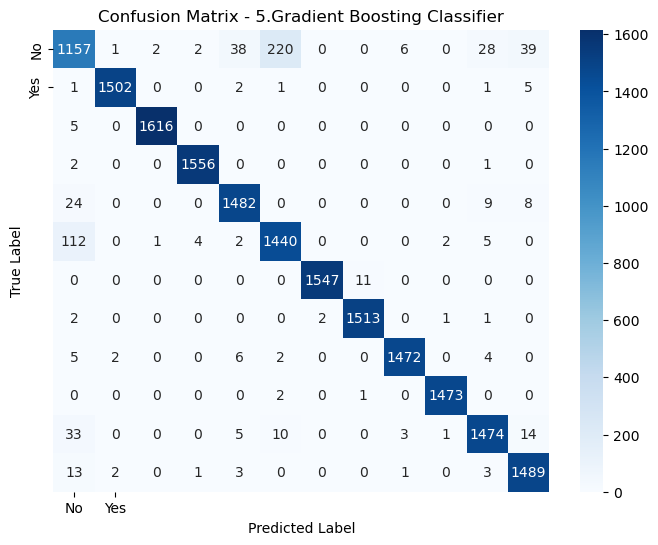

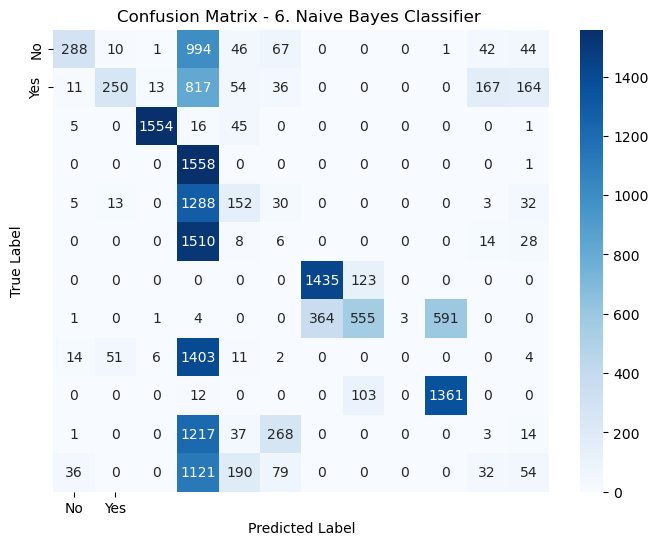

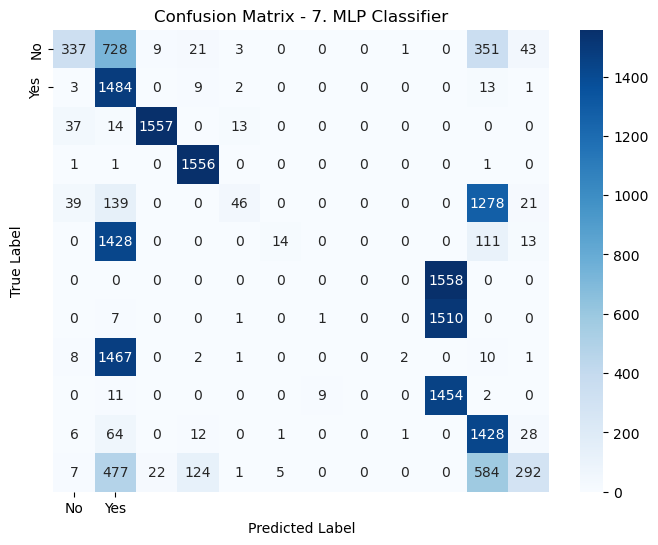

In [119]:

from sklearn.metrics import confusion_matrix                                  

for name,model in Models.items():                                                                                  #looping the models.
    y_pred=model.predict(X_test_selected)                                                                          #making predictions.
    y_pred_prob=model.predict_proba(X_test_selected)[:,1]if hasattr(model,"predict_proba")else y_pred              #checking for probability predictions.

    #Confusion Matrix:
    cm=confusion_matrix(y_test,y_pred)                  #computing the Confusion Matrix.
                                                        #compares actual labels (y_test) with predicted labels (y_pred) and generates a confusion matrix.
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=['No','Yes'],yticklabels=['No','Yes'])
                                                                                        #annot=True: Displays values inside the heatmap cells.
                                                                                        #fmt="d": Ensures values are displayed as integers.
                                                                                        #cmap="Blues": Uses a blue color scheme for better visualization.
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

### Model Comparison:

* Decision Tree, Random Forest, and Gradient Boosting show strong diagonal patterns with high values, indicating good overall classification performance. These models have strong diagonal elements and relatively few off-diagonal elements.

* SVC  shows a peculiar pattern: it appears to be predicting mostly one class (likely the 8th or 9th column) regardless of the true label. This suggests model bias or poor generalization.

* Naive Bayes  shows significant misclassifications with notable off-diagonal patterns. There's substantial confusion, particularly with what appears to be the 4th predicted class.

* MLP Classifier shows mixed performance with certain classes being predicted well (dark blue diagonal cells) but others showing significant confusion, particularly with the 6th predicted class and last predicted class.

* Logistic Regression shows moderate performance with some well-predicted classes but notable confusion in others.

### Best Overall Performance based on confusion matrix: 

* Random Forest shows strong classification ability, with more true positives (diagonal values).Gradient Boosting also performs well but has slightly more misclassifications in some classes.

* Random Forest appears to be slightly better in handling most classes, reducing misclassifications.Gradient Boosting has better performance in some classes but allows slightly more errors in others.

* Based on the diagonal elements (correct classifications), the ensemble methods (Random Forest and Gradient Boosting) appear to perform best overall, with consistent prediction accuracy across most classes.

* Decision Tree also performs well but with slightly different error patterns than the ensemble methods.

* The third class (with ~1570 correctly classified samples) is consistently well-predicted across all models.


<h3 style="color: green; text-align: left; font-size: 06 px;"> 🚀 Random Forest may be more stable across all classes, with fewer misclassifications.


<h1 style="color: brown; text-align: left; font-size: 25px;"> ROC (Receiver Operating Characteristic) Curve </b></h1> 

#### AUC (Area Under the Curve):
* AUC stands for Area Under the Curve. Specifically, in the context of the ROC curve (Receiver Operating Characteristic curve), it represents the area under the curve and is used as a measure of the model’s ability to discriminate between classes (usually positive and negative classes).

* AUC quantifies how well the model distinguishes between the two classes, and it is particularly useful when dealing with imbalanced datasets (where one class is much more frequent than the other).

#### Understanding AUC:
* ROC Curve: The ROC curve plots the True Positive Rate (TPR) (also known as Sensitivity or Recall) against the False Positive Rate (FPR) at various threshold values.

* True Positive Rate (TPR): The proportion of actual positives correctly identified by the model.
* False Positive Rate (FPR): The proportion of actual negatives incorrectly identified as positive by the model.
* AUC Score: The AUC score is the area under the ROC curve, and it gives a measure of how well the model is distinguishing between the two classes.

### Key Elements of ROC Curve Evaluation

#### AUC (Area Under Curve):

Values range from 0.5 (random classifier) to 1.0 (perfect classifier)
General interpretation:

* 0.9-1.0: Excellent discrimination
* 0.8-0.9: Good discrimination
* 0.7-0.8: Fair discrimination
* 0.6-0.7: Poor discrimination
* 0.5-0.6: Failed discrimination

#### Curve Shape and Position:

* A curve closer to the top-left corner indicates better performance
* The steeper the initial rise, the better the classifier is at high-confidence predictions
* Look for "elbows" in the curve that might indicate optimal threshold points

#### Model Comparison

* Compare curves visually - a curve that dominates (is above) another across all or most thresholds is superior
* Use confidence intervals on AUC to determine if differences are statistically significant
* Watch for curves that cross, which indicates different strengths at different operation points

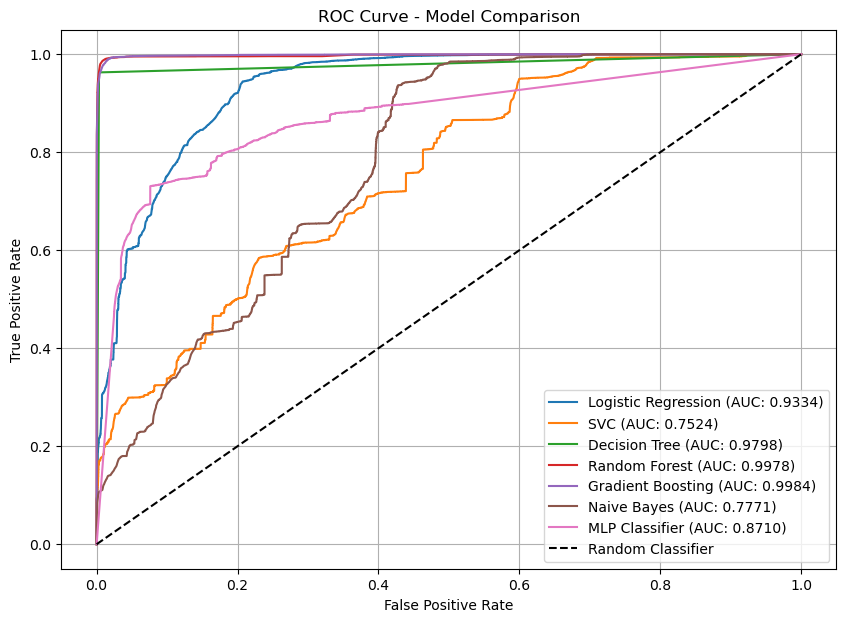

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize labels
classes = np.unique(y_train)
y_train_bin = label_binarize(y_train, classes=classes)
y_test_bin = label_binarize(y_test, classes=classes)

# Define models
Models = {  
    'Logistic Regression': OneVsRestClassifier(LogisticRegression()),
    'SVC': OneVsRestClassifier(SVC()),  
    'Decision Tree': OneVsRestClassifier(DecisionTreeClassifier()),
    'Random Forest': OneVsRestClassifier(RandomForestClassifier()),
    'Gradient Boosting': OneVsRestClassifier(GradientBoostingClassifier()),
    'Naive Bayes': OneVsRestClassifier(GaussianNB()),
    'MLP Classifier': OneVsRestClassifier(MLPClassifier())
}

# Set up ROC plot
plt.figure(figsize=(10, 7))

for name, model in Models.items():

    # Use OneVsRestClassifier for multi-class problems
    ovr_model = OneVsRestClassifier(model)
    ovr_model.fit(x_train, y_train_bin)

    # Use predict_proba() if available, otherwise use decision_function()
    if hasattr(ovr_model, "predict_proba"):
        y_pred_prob = ovr_model.predict_proba(x_test)
    else:
        y_pred_prob = ovr_model.decision_function(x_test)

    # Compute micro-average ROC Curve & AUC
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    auc_score = auc(fpr, tpr)

    # Plot ROC Curve for each model
    plt.plot(fpr, tpr, label=f"{name} (AUC: {auc_score:.4f})")

# Diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Customize the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Model Comparison")
plt.legend(loc="lower right")
plt.grid(True)

# Show the plot
plt.show()

### 🔍 Insights from the ROC Curve Analysis

* Random Forest and Gradient Boosting are tied for the best performance with AUC scores of 0.9978 and 0.9984  nearly perfect

* This confirms what we observed in the confusion matrices, where both models showed very similar and strong classification patterns

* Random Forest and Gradient Boosting curves rise almost vertically from the origin, indicating excellent sensitivity and specificity across thresholds

* Logistic Regression (AUC = 0.9334) and Decision Tree (AUC = 0.9798) also perform well but slightly less than ensemble methods.

* MLP Classifier (AUC = 0.8710) and Naïve Bayes (AUC = 0.7771) are moderate performers.

* SVC (AUC = 0.7524) has the lowest performance among the tested models, indicating it is less effective at distinguishing between classes.


<h1 style="color: brown; text-align: left; font-size: 25px;"> Hyperparameter Tuning </b></h1> 

Hyperparameter tuning is the process of optimizing model parameters that control how a machine learning algorithm learns.

### 🔥 Why is Hyperparameter Tuning Important?

* Prevents overfitting (too complex) or underfitting (too simple).
  
* Improves model accuracy, precision, recall, and other metrics.

* Helps find the best balance between bias and variance.

#### Random Forest Model
* random_state=42: Ensures reproducibility.
* n_estimators=50: Starts with 50 trees, but tuning will adjust it.
* max_depth=10: Limits tree depth to prevent overfitting.
* min_samples_split=5: Ensures a node must have at least 5 samples before splitting.
* min_samples_leaf=2: Prevents leaves with fewer than 2 samples.
* max_features='sqrt': Uses the square root of total features for each split (best for high-dimensional data).
* n_jobs=-1: Uses all CPU cores for faster computation.

In [127]:
rfg = RandomForestClassifier(
    random_state=42,
    n_estimators=50,         
    max_depth=10,             
    min_samples_split=5,      
    min_samples_leaf=2,       
    max_features='sqrt',      
    n_jobs=-1                
)


In [128]:
param_grid = {
    'n_estimators': [50, 100, 200,300],  
    'max_depth': [10, 20, None],     
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]   
}

In [129]:
grid_search = GridSearchCV(
    estimator=rfg,
    param_grid=param_grid,
    cv=10,  
    scoring='accuracy',  
    n_jobs=-1, 
    verbose=2   
)

In [130]:
grid_search.fit(X_train_selected, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=10, min_samples_leaf=2,
                                              min_samples_split=5,
                                              n_estimators=50, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='accuracy', verbose=2)

In [131]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [132]:
print("Best Accuracy Score:", grid_search.best_score_)

Best Accuracy Score: 0.9704129048410473


#### 🚀 Impact of Hyperparameter Tuning on Model Performance

The accuracy improved from 0.9640 (Random Forest Classifier) to 0.9704 after hyperparameter tuning! 


<h1 style="color: brown; text-align: left; font-size: 25px;"> Best Model Estimator </b></h1> 

In [135]:
best_model = grid_search.best_estimator_
best_model

RandomForestClassifier(max_depth=20, min_samples_split=5, n_jobs=-1,
                       random_state=42)

<h1 style="color: brown; text-align: left; font-size: 25px;"> Saving Best Model </b></h1> 

In [137]:
# Define the best model with the given parameters
best_model = RandomForestClassifier(max_depth=20, min_samples_split=5, n_jobs=-1,
                       random_state=42)

In [138]:
# Fit the model with your training data 
best_model.fit(X_train_selected,y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=300,
                       n_jobs=-1, random_state=42)

In [139]:
y_pred = best_model.predict(X_test_selected)

In [140]:
cm = confusion_matrix(y_test,y_pred)

In [141]:
cm

array([[1217,    0,    4,    1,   12,  224,    0,    1,    4,    1,   15,
          14],
       [   0, 1507,    0,    0,    3,    0,    0,    0,    0,    0,    2,
           0],
       [   5,    0, 1616,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   2,    0,    0, 1555,    0,    0,    0,    0,    0,    0,    1,
           1],
       [   9,    3,    0,    0, 1500,    1,    0,    0,    0,    0,    9,
           1],
       [ 115,    0,    0,    0,    2, 1442,    0,    0,    1,    1,    4,
           1],
       [   0,    0,    0,    0,    0,    0, 1552,    6,    0,    0,    0,
           0],
       [   0,    0,    0,    0,    0,    0,   17, 1495,    0,    7,    0,
           0],
       [   5,    3,    0,    0,    3,    2,    0,    0, 1472,    0,    5,
           1],
       [   0,    0,    0,    0,    0,    2,    0,    2,    0, 1472,    0,
           0],
       [  32,    0,    0,    0,    0,    6,    0,    0,    1,    0, 1495,
           6],
       [   3,    0,  

In [142]:
accuracy = accuracy_score(y_test, y_pred)

In [143]:
print("Accuracy Score : ",accuracy)

Accuracy Score :  0.9706042460533478


In [144]:
# Save the model to a file using joblib
joblib.dump(best_model, 'Random_Forest_Classifier.joblib')
print("Best Random_Forest_Classifier model saved successfully.")

Best Random_Forest_Classifier model saved successfully.


In [145]:
loaded_model = joblib.load("Random_Forest_Classifier.joblib")

<h1 style="color: brown; text-align: left; font-size: 25px;"> Pipeline Creation </b></h1> 

A pipeline is a way to automate data preprocessing and model training in one step. It helps streamline the workflow by chaining multiple processes together like scaling, feature selection, and model training.

- ✅ Makes code cleaner and more organized
- ✅ Avoids data leakage (ensures transformations happen only on training data)
- ✅ Easier to test different models
- ✅ Reduces errors by keeping everything structured

Now, whenever new data comes in, you can simply calland it will automatically preprocess and predict in one step! 🚀




In [147]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [148]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42))
])

In [149]:
pipeline.fit(X_train_selected,y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=2,
                                        min_samples_split=5,
                                        random_state=42))])

In [150]:
joblib.dump(pipeline,'IoT_Guardian_Random_Forest_pipeline.joblib')

['IoT_Guardian_Random_Forest_pipeline.joblib']

In [151]:
loaded_pipeline = joblib.load('IoT_Guardian_Random_Forest_pipeline.joblib')

<h1 style="color: brown; text-align: left; font-size: 25px;"> Prediction Phase</b></h1> 

In [153]:
# Select 10 random indices
random_indices = np.random.choice(X.shape[0], 10, replace=False)

# Use NumPy indexing directly
x_random = X.iloc[random_indices]
y_random = y[random_indices]

In [154]:
# Apply the SelectKBest transformation to the random selection of features
X_random_selected = sk.transform(x_random)  # Use the same selector fitted before

In [155]:
# Make predictions using the loaded pipeline
predicted = loaded_pipeline.predict(X_random_selected)

In [156]:
results = pd.DataFrame({
    "id.resp_p": df.loc[x_random.index, 'id.resp_p'],  # Corresponding ids
    "Predicted": predicted                # Predictions from the model
})

In [157]:
results["Predicted"] = results["Predicted"]

In [158]:
results

,id.resp_p,Predicted
31685,21,NMAP_TCP_scan
65366,21,NMAP_TCP_scan
89657,21,NMAP_TCP_scan
115116,21,DOS_SYN_Hping
73794,21,NMAP_TCP_scan
60469,21,NMAP_TCP_scan
15181,53,Wipro_bulb
79174,21,DOS_SYN_Hping
3216,1883,Wipro_bulb
113969,21,DOS_SYN_Hping


In [159]:
unseen_data = pd.read_csv('unseen.csv')

In [160]:
df_unseen = pd.DataFrame(unseen_data)

In [161]:
df_unseen.head()

,id.resp_p,proto,service,fwd_header_size_min,fwd_header_size_max,bwd_header_size_min,bwd_header_size_max,flow_FIN_flag_count,flow_SYN_flag_count,flow_RST_flag_count,...,flow_iat.avg,flow_iat.std,payload_bytes_per_second,idle.min,idle.max,idle.avg,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack type
0,80,1,2,32,40,32,40,2,2,0,...,74589.53424,119924.58080,906.349119,0.0,0.0,0.0,64240,26847,501,Thing_Speak
1,53,2,1,8,8,8,8,0,0,0,...,17793.65540,28900.31470,3297.055347,0.0,0.0,0.0,0,0,0,Thing_Speak
2,80,1,2,32,40,32,40,2,2,0,...,62673.63375,98081.01571,1079.233429,0.0,0.0,0.0,64240,26847,501,Thing_Speak
3,53,2,1,8,8,8,8,0,0,0,...,19334.63415,31506.21849,3034.278602,0.0,0.0,0.0,0,0,0,Thing_Speak
4,80,1,2,32,40,32,40,2,2,0,...,89197.63565,124652.49180,870.276126,0.0,0.0,0.0,64240,26847,501,Thing_Speak


In [162]:
x_unseen = df_unseen.drop('Attack type',axis =1)
y_unseen = df_unseen['Attack type']

In [163]:
y_pred_unseen = loaded_pipeline.predict(x_unseen)

In [164]:
df_unseen['Predicted Attack'] = y_pred_unseen

In [287]:
df_unseen.head(3)

,id.resp_p,proto,service,fwd_header_size_min,fwd_header_size_max,bwd_header_size_min,bwd_header_size_max,flow_FIN_flag_count,flow_SYN_flag_count,flow_RST_flag_count,...,flow_iat.std,payload_bytes_per_second,idle.min,idle.max,idle.avg,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack type,Predicted Attack
0,80,1,2,32,40,32,40,2,2,0,...,119924.58080,906.349119,0.0,0.0,0.0,64240,26847,501,Thing_Speak,Wipro_bulb
1,53,2,1,8,8,8,8,0,0,0,...,28900.31470,3297.055347,0.0,0.0,0.0,0,0,0,Thing_Speak,Wipro_bulb
2,80,1,2,32,40,32,40,2,2,0,...,98081.01571,1079.233429,0.0,0.0,0.0,64240,26847,501,Thing_Speak,Wipro_bulb


<h1 style="color: brown; text-align: left; font-size: 25px;"> Conclusion </b></h1> 

The RandomForest model achieved an impressive accuracy of 97% and an AUC score of 0.9980, indicating strong classification performance. However, despite hyperparameter tuning and oversampling with SMOTE to address data imbalance, incorrect predictions persist, suggesting limitations in the dataset and model generalization.

#### Limitations of the Dataset
* Severe Class Imbalance – The dataset is heavily skewed towards certain attack types like DOS_SYN_Hping (90,089 instances) compared to rare attacks like Metasploit_Brute_Force_SSH (36 instances) and NMAP_FIN_SCAN (28 instances). This imbalance can lead to model bias, favoring majority classes while underperforming on minority ones.

* Synthetic Oversampling Challenges – While SMOTE helps mitigate class imbalance, it may introduce synthetic data points that do not fully represent real-world attack variations, leading to potential misclassifications.

* Feature Discrimination – Some attack types (e.g., NMAP scan variations) might have subtle feature differences, making it difficult for the model to differentiate between them effectively.

* Potential Overfitting – The exceptionally high AUC score suggests the model might be overfitting to the training data, capturing patterns that may not generalize well to unseen data.

* Real-World Generalization – The dataset may not encompass all possible attack scenarios, leading to poor generalization in a real-world cybersecurity environment.

<h1 style="color: brown; text-align: left; font-size: 25px;"> Future Improvements </b></h1> 


* Cost-sensitive learning – Instead of SMOTE, using cost-sensitive algorithms like weighted loss functions in tree-based models could improve classification for minority classes.

* Anomaly Detection Techniques – Implementing hybrid models combining anomaly detection with supervised learning could enhance rare attack identification.

* Feature Engineering – Refining feature selection or extracting more meaningful attack patterns may improve model robustness.

* Ensemble Methods – Combining multiple models (e.g., boosting with XGBoost or stacking classifiers) could enhance prediction reliability.

<h3 style="color: green; text-align: left; font-size: 08 px;"> 🚀 Despite its limitations, the current model provides a strong baseline for attack detection, but further refinements are needed to enhance minority class detection and real-world applicability.